In [258]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **Motor Vehicle Thefts**

In [259]:
# Custom rc definitions
rc = {
        'axes.spines.right': True,
        'axes.spines.top': True,
        'font.family': ['sans-serif'],
        'font.sans-serif':
        # 'Arial',
        'DejaVu Sans',
        # 'Liberation Sans',
        # 'Bitstream Vera Sans',
        # 'sans-serif',
        "xtick.bottom":True,
        'axes.edgecolor': 'indigo',
        'xtick.color': 'black',
        'figure.facecolor': "snow",
        'grid.color': 'grey',
        
}


# font definitions
font_label = {'family': 'serif',
        'color':  'darkred',
        'weight': 'semibold',
        'size': 16,
        }

font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }

font_fig = {'family': 'sans',
        'color':  'chocolate',
        # 'weight': 'bold', # doesn't apply to it. Must be specified independently
        # 'fontsize': 30, # doesn't apply to it. Must be specified independently
        }

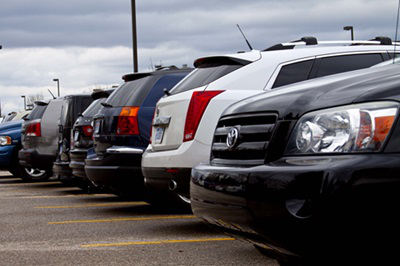

In [260]:
from PIL import Image
img =Image.open("../img/cars_lot.jpeg")
img

## **Loading the data**

In [261]:
locations = pd.read_csv("../data/locations.csv")
make_details = pd.read_csv("../data/make_details.csv")
stolen_vehicles = pd.read_csv("../data/stolen_vehicles.csv")

## **Getting to know the data**

### **Locations**

In [262]:
locations_cleaning = locations.copy()

In [263]:
# checking for null values
locations_cleaning.isna().sum()

location_id    0
region         0
country        0
population     0
density        0
dtype: int64

In [264]:
# Checking for duplicates
print(f"How many duplicates: {locations_cleaning.duplicated().sum()}")

# # Removal of duplicates
# locations_cleaning.drop_duplicates(inplace=True)

How many duplicates: 0


In [265]:
print(f"locations shape: {locations_cleaning.shape}\n")
print(f"locations dimension: {locations_cleaning.ndim}\n")
print(f"locations data types: \n{locations_cleaning.dtypes}")
locations_cleaning.head()

locations shape: (16, 5)

locations dimension: 2

locations data types: 
location_id      int64
region          object
country         object
population      object
density        float64
dtype: object


,location_id,region,country,population,density
0,101,Northland,New Zealand,"201,500",16.11
1,102,Auckland,New Zealand,"1,695,200",343.09
2,103,Waikato,New Zealand,"513,800",21.50
3,104,Bay of Plenty,New Zealand,"347,700",28.80
4,105,Gisborne,New Zealand,"52,100",6.21


In [266]:
locations_cleaning.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location_id  16 non-null     int64  
 1   region       16 non-null     object 
 2   country      16 non-null     object 
 3   population   16 non-null     object 
 4   density      16 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.5 KB


In [267]:
locations_cleaning.describe(include=np.number)

,location_id,density
count,16.000000,16.000000
mean,108.500000,43.300625
std,4.760952,86.218074
min,101.000000,1.410000
25%,104.750000,6.182500
50%,108.500000,13.820000
75%,112.250000,23.325000
max,116.000000,343.090000


In [268]:
locations_cleaning.describe(include=np.object)

,region,country,population
count,16,16,16
unique,16,1,16
top,Gisborne,New Zealand,"1,695,200"
freq,1,16,1


**Observations**
- change the data type of population to int32
- change the data type of location_id to int8
- change all objects to categories

In [469]:
# Memory management
def memory_magment(df):
    for col in df.columns:
        col_type = df[col].dtype

        cond1 = (col_type == np.object ) or (col_type == pd.CategoricalDtype)
        if cond1:
            df[col] = df[col].astype('category')  
        else:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8) # int 8
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16) # int 16
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)  # in 32
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64) # int 64 
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].round(3)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].round(3)
                else:
                    df[col] = df[col].round(3) # float64

    return df

In [269]:
# Data conversion and memory management
location_data_memory = locations_cleaning.copy()
location_data_memory.population = location_data_memory.population.str.replace(",",'').astype("int32")
location_data_memory = memory_magment(location_data_memory)

In [270]:
location_data_memory.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   location_id  16 non-null     int8    
 1   region       16 non-null     category
 2   country      16 non-null     category
 3   population   16 non-null     int32   
 4   density      16 non-null     float64 
dtypes: category(2), float64(1), int32(1), int8(1)
memory usage: 2.2 KB


- Memory has reduced from 3.5 to 2.2KB
- All target columns has been modified

In [271]:
location_data_memory.head()

,location_id,region,country,population,density
0,101,Northland,New Zealand,201500,16.11
1,102,Auckland,New Zealand,1695200,343.09
2,103,Waikato,New Zealand,513800,21.50
3,104,Bay of Plenty,New Zealand,347700,28.80
4,105,Gisborne,New Zealand,52100,6.21


Let's get the area from using the population density formula
$$\ population-density= \frac{population}{area(km)^2}

In [272]:
location_featured = location_data_memory.copy()
location_featured["area"] = (location_featured['population']/location_featured['density']).round(3)

In [274]:
location_featured.describe(include=np.number)

,location_id,population,density,area
count,16.000000,1.600000e+01,16.000000,16.000000
mean,108.500000,3.202000e+05,43.300625,16506.952000
std,4.760952,4.149945e+05,86.218074,11796.387108
min,101.000000,3.270000e+04,1.410000,421.990000
25%,104.750000,5.765000e+04,6.182500,8304.637250
50%,108.500000,1.921000e+05,13.820000,12290.338000
75%,112.250000,3.892250e+05,23.325000,23368.035250
max,116.000000,1.695200e+06,343.090000,44497.283000


In [275]:
cat_columns = location_featured.select_dtypes(include=pd.CategoricalDtype)
cat_columns
for column in cat_columns:
    print(f"These are the values in the {column} column:\n{location_featured[column].unique().tolist()}\n")
    print(f"This is the total values present in the: {column} column:\n{location_featured[column].nunique()}\n")

These are the values in the region column:
['Northland', 'Auckland', 'Waikato', 'Bay of Plenty', 'Gisborne', "Hawke's Bay", 'Taranaki', 'Manawatū-Whanganui', 'Wellington', 'Tasman', 'Nelson', 'Marlborough', 'West Coast', 'Canterbury', 'Otago', 'Southland']

This is the total values present in the: region column:
16

These are the values in the country column:
['New Zealand']

This is the total values present in the: country column:
1



In [276]:
location_featured.head()

,location_id,region,country,population,density,area
0,101,Northland,New Zealand,201500,16.11,12507.759
1,102,Auckland,New Zealand,1695200,343.09,4940.978
2,103,Waikato,New Zealand,513800,21.50,23897.674
3,104,Bay of Plenty,New Zealand,347700,28.80,12072.917
4,105,Gisborne,New Zealand,52100,6.21,8389.694


**For EDA**

- Check which region has the highest population
- Check which region has the highest population density
- Check which region has the highest area

**Suggested chart(s):** *Bar Chart*

In [277]:
# Not sorted
location_featured.head()

,location_id,region,country,population,density,area
0,101,Northland,New Zealand,201500,16.11,12507.759
1,102,Auckland,New Zealand,1695200,343.09,4940.978
2,103,Waikato,New Zealand,513800,21.50,23897.674
3,104,Bay of Plenty,New Zealand,347700,28.80,12072.917
4,105,Gisborne,New Zealand,52100,6.21,8389.694


In [278]:
# Sorted
location_featured.sort_values(by="population", ascending=False).head()

,location_id,region,country,population,density,area
1,102,Auckland,New Zealand,1695200,343.09,4940.978
13,114,Canterbury,New Zealand,655000,14.72,44497.283
8,109,Wellington,New Zealand,543500,67.52,8049.467
2,103,Waikato,New Zealand,513800,21.50,23897.674
3,104,Bay of Plenty,New Zealand,347700,28.80,12072.917


In [279]:
population_ordering = location_featured.sort_values(by="population", ascending=False)['region'].to_list()
density_ordering = location_featured.sort_values(by="density", ascending=False)['region'].to_list()
area_ordering = location_featured.sort_values(by="area", ascending=False)['region'].to_list()

In [281]:
def plotting_bar(data:pd.DataFrame,y:str,ordering=None):
    try:
        fig,ax = plt.subplots(1,figsize=(20,10),constrained_layout=True)
        sns.set_theme(style='whitegrid',rc=rc,palette='Set2')
        sns.barplot(data=data,x="region",y=y,order=ordering)

        ax.set_title(f"{y} bar plot",fontdict=font_title)
        ax.set_xlabel(f"Region",fontdict=font_label)
        ax.set_ylabel(f"{y}",fontdict=font_label)
        
        if ordering == None:
            labels = data['region'].to_list()
            ax.set_xticklabels(labels=labels,rotation=90, fontsize=20)
        else:
            ax.set_xticklabels(labels=ordering,rotation=90, fontsize=20)
    except KeyError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        data.info(memory_usage='deep')

In [304]:
num_list = location_featured.select_dtypes(include=np.number).columns.to_list()
# pop the first element
# num_list.pop(0)
num_list

['population', 'density', 'area']

In [305]:
orders = [population_ordering,density_ordering,area_ordering]

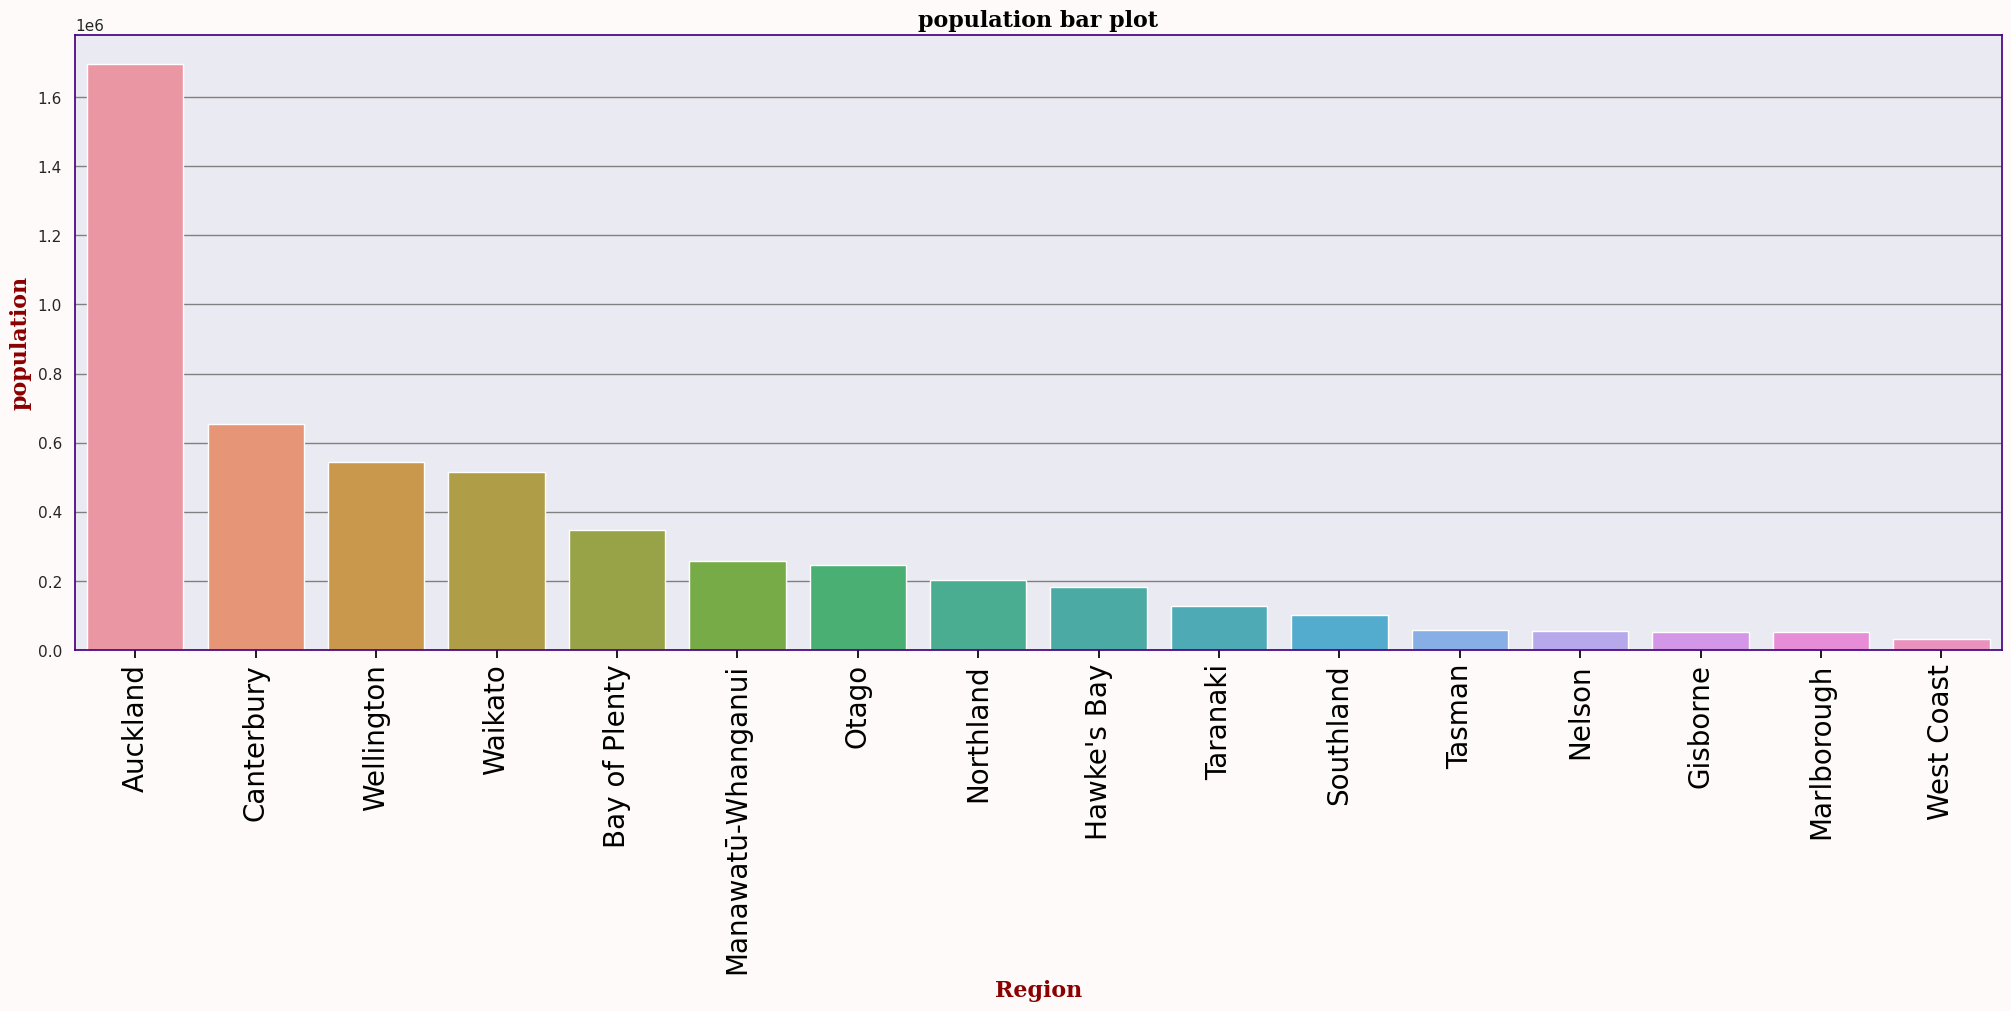

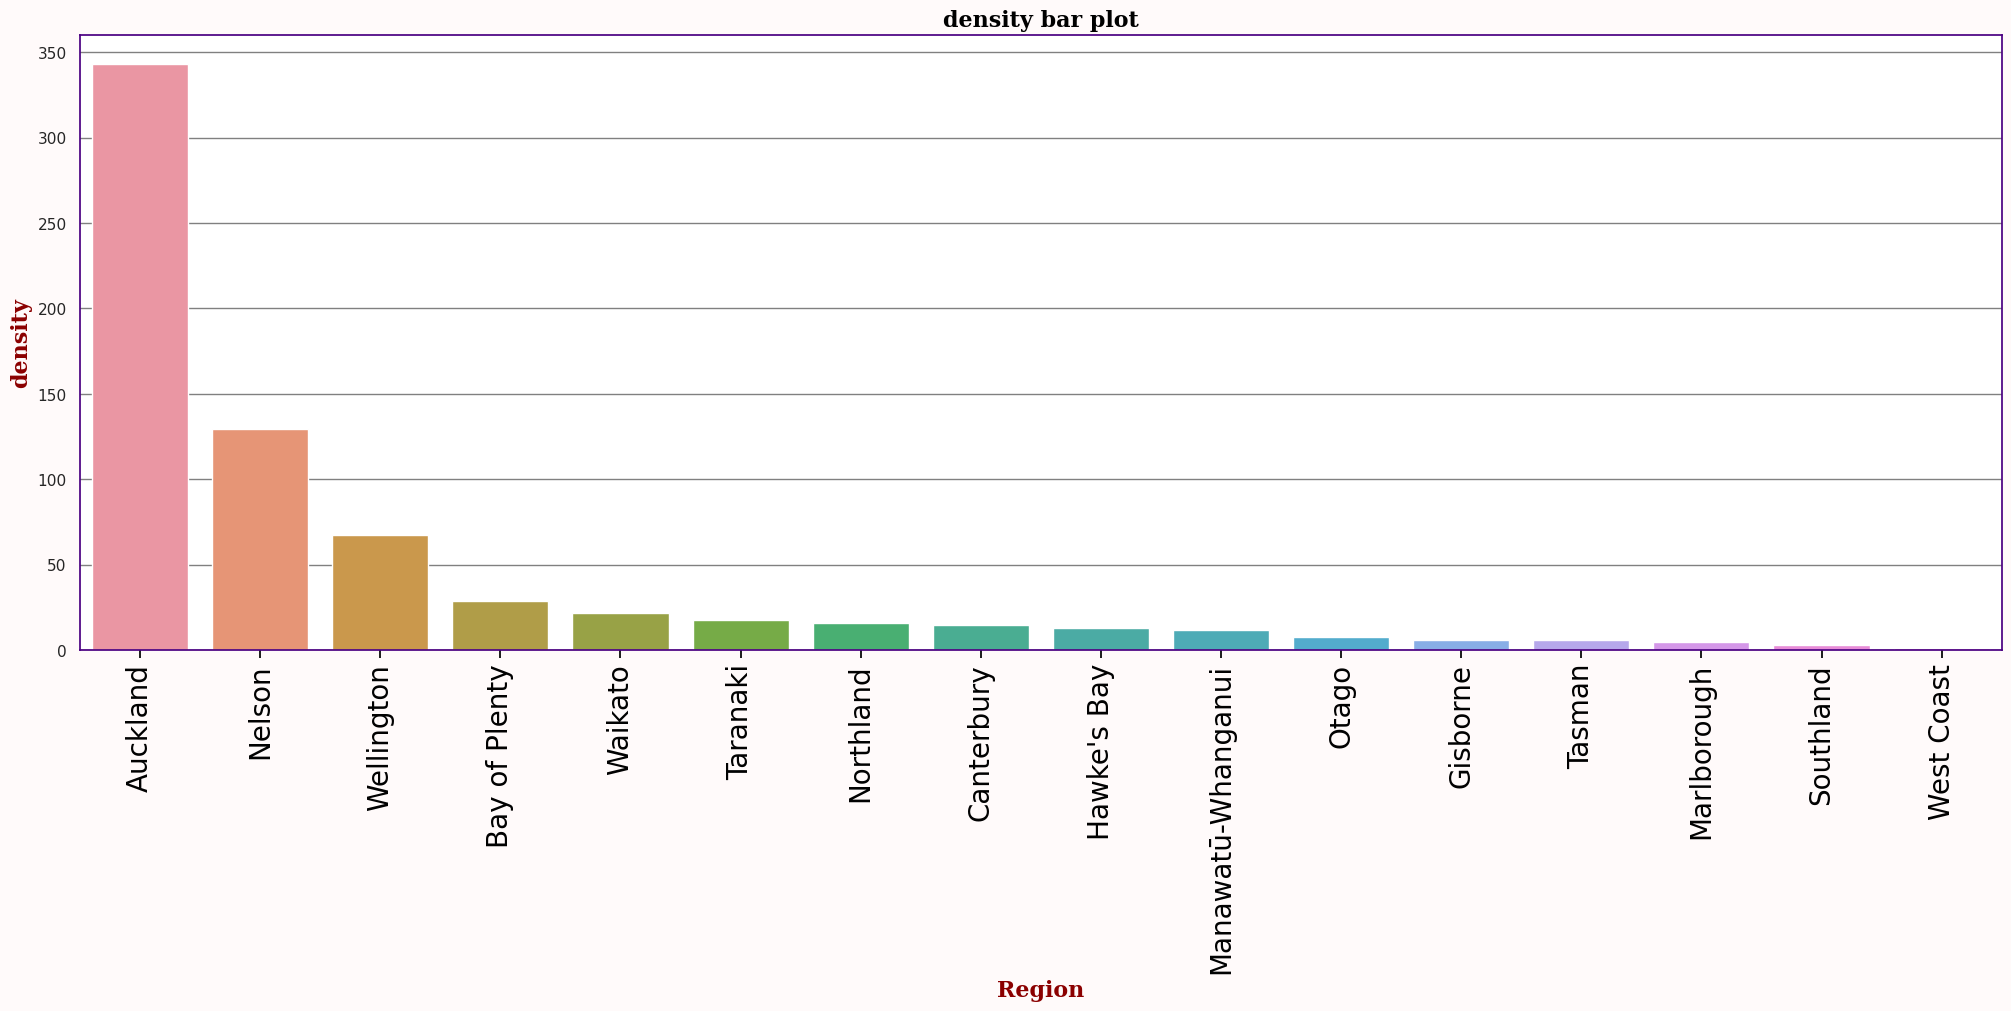

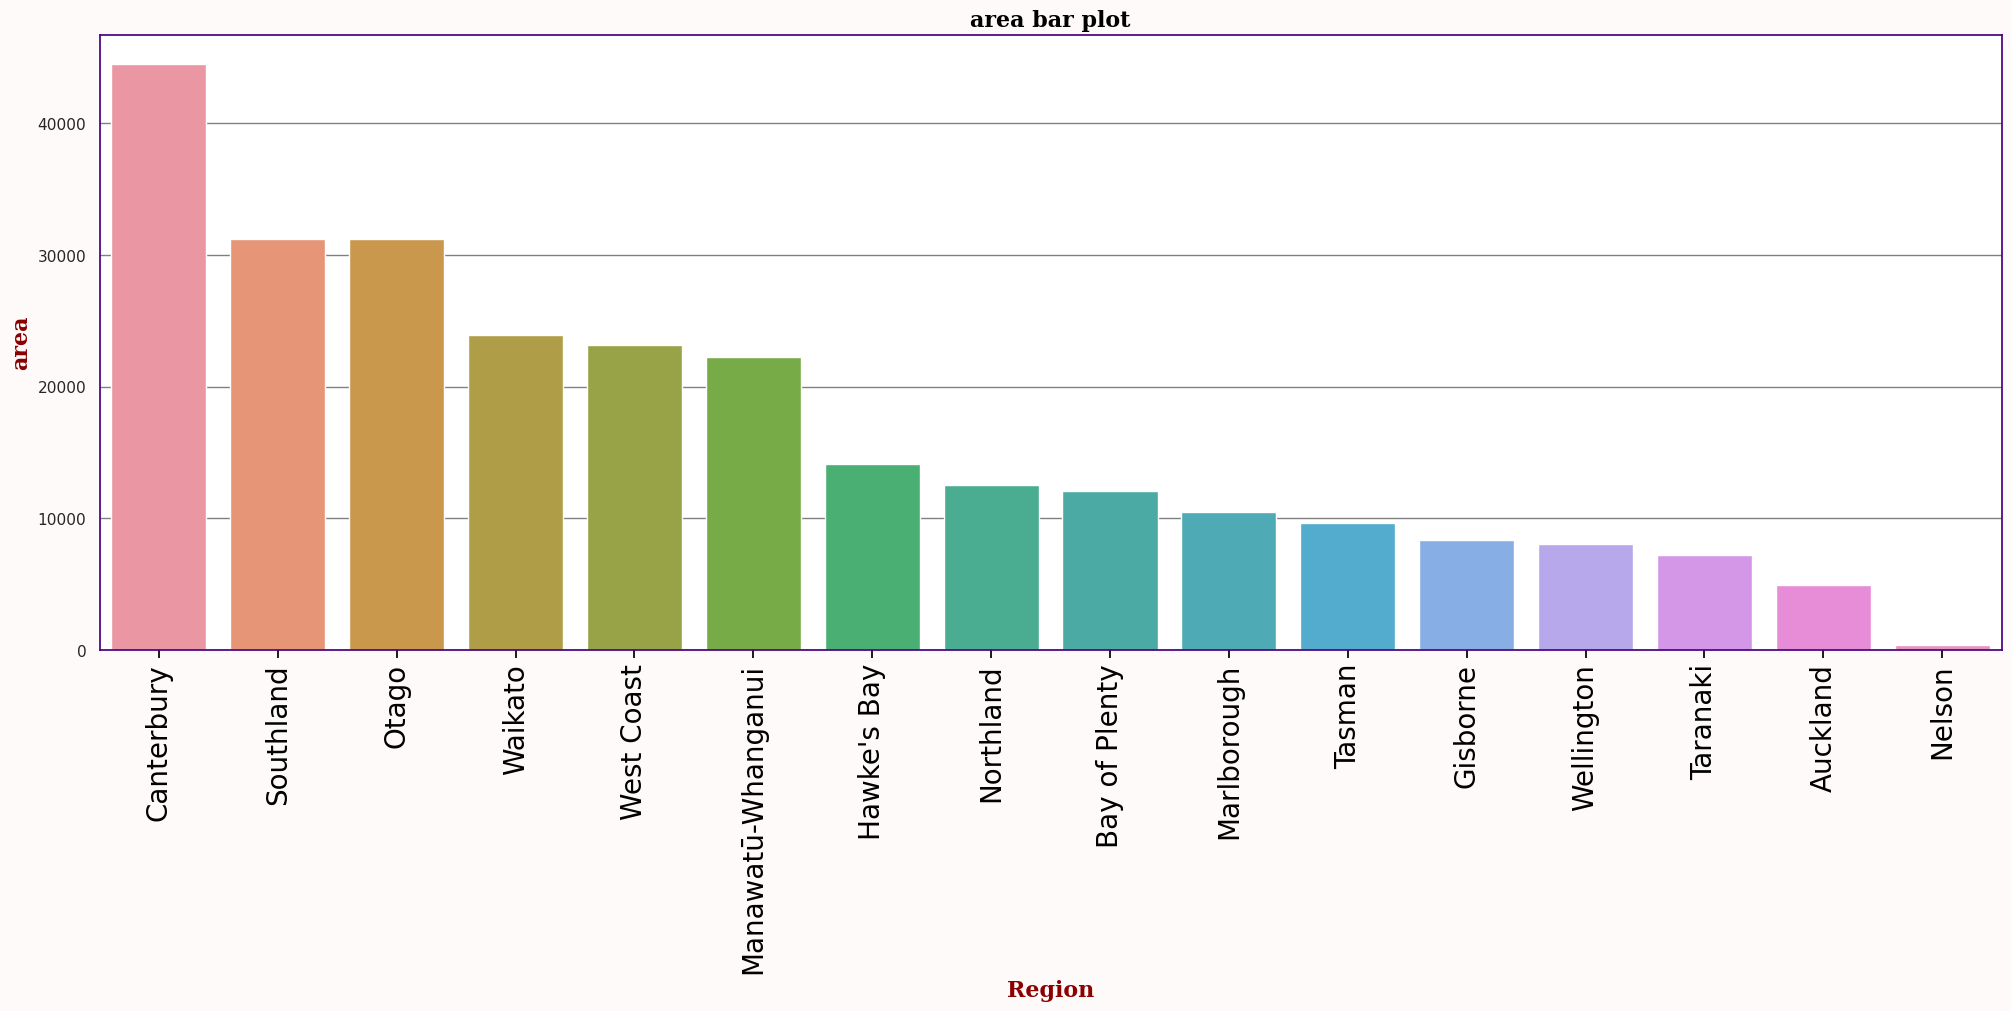

In [306]:
for y,ordering in zip(num_list,orders):
    plotting_bar(location_featured,y,ordering=ordering)

In [307]:
num_list = location_featured.select_dtypes(include=np.number).columns.to_list()
num_list

['location_id', 'population', 'density', 'area']

In [308]:
corr = location_featured[num_list].corr()

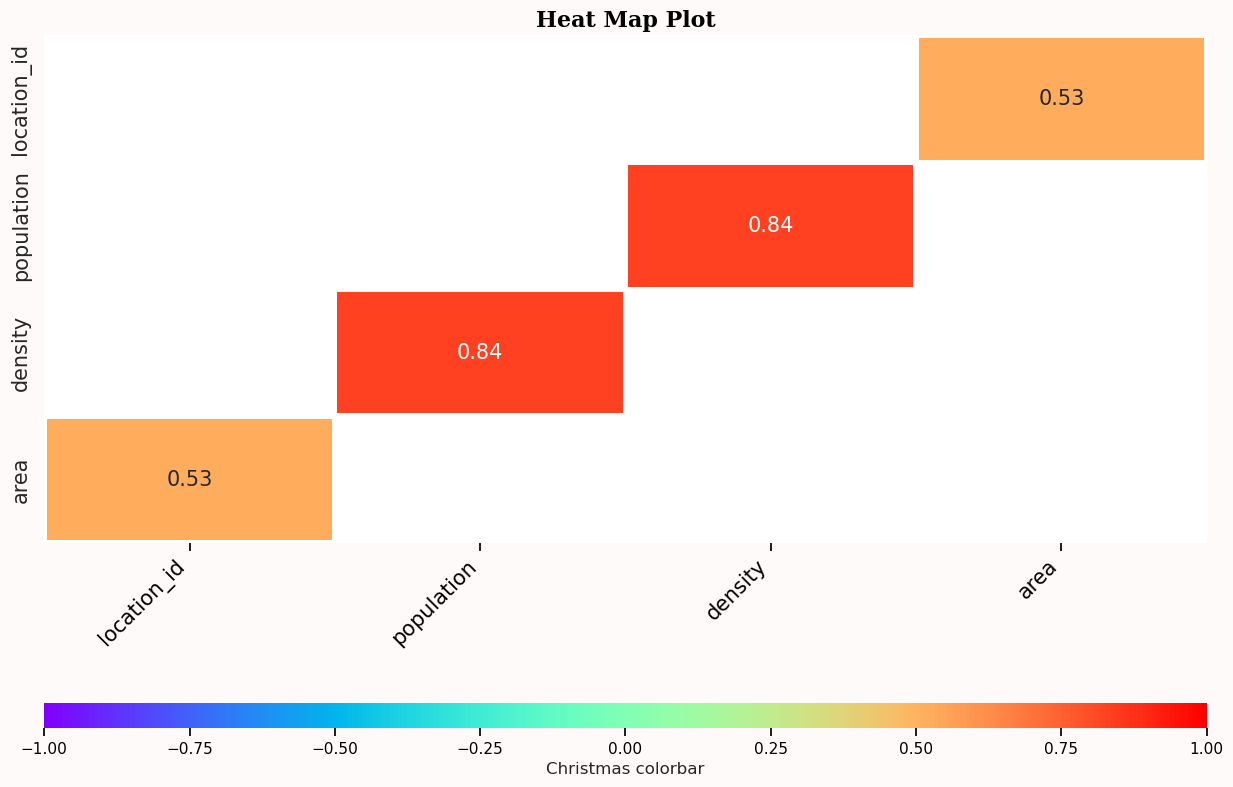

In [309]:
cond = (corr <= -.5) | (corr >= .5)
filter_corr  = corr[(cond) & (corr!=1)]
sns.set_theme(style='whitegrid',rc=rc)
grid_kws = {"height_ratios": (1,.05),"hspace":.6}
fig, (ax,cbar_ax) = plt.subplots(2,figsize=(15,9),gridspec_kw=grid_kws)

heatmap = sns.heatmap(
    filter_corr,
    ax=ax,
    cbar_ax=cbar_ax,
    cmap='rainbow',
    annot=True,
    annot_kws={'size': 15},
    vmin=-1,
    vmax=1,
    cbar_kws={"orientation":"horizontal",'label':"Christmas colorbar"},
    linewidths=3
)
# Rotate x-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right',fontsize=15)
heatmap.set_yticklabels(heatmap.get_yticklabels(),fontsize=15)
heatmap.set_title("Heat Map Plot",fontdict=font_title)
plt.show()

In [310]:
def plotting_lines(data,x:str,y:str):
    try:
        sns.set_theme(style='whitegrid',palette='husl',rc=rc)
        fig,ax = plt.subplots(figsize=(20,10))
        sns.lineplot(data=data,x=x,y=y)
        ax.set_title(f'Line plot of {x} vs {y}',fontdict=font_title)
        ax.set_xlabel(f'{x}',fontdict=font_label)
        ax.set_ylabel(f'{y}',fontdict=font_label)
    except ValueError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        data.info(memory_usage='deep')

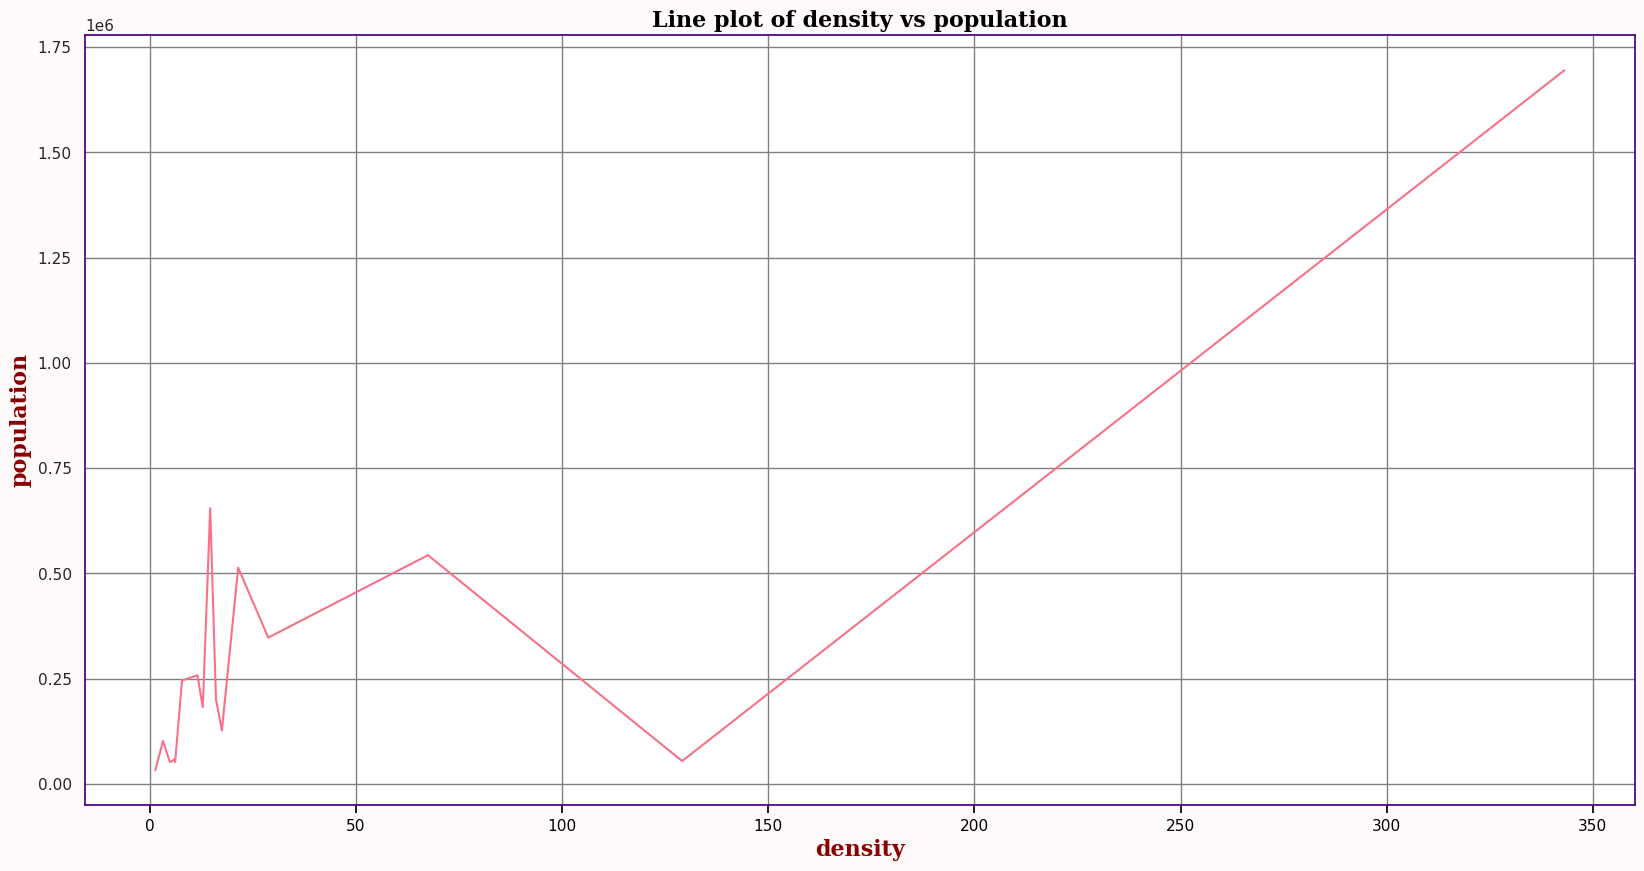

In [311]:
plotting_lines(location_featured,'density','population')

In [312]:
def plotting_scatter(data,x:str,y:str):
    try:
        sns.set_theme(style='darkgrid',palette='bright',rc=rc)
        fig,ax = plt.subplots(figsize=(20,10))
        sns.scatterplot(data=data,x=x,y=y) #,hue='gender')
        ax.set_title(f'Line plot of {x} vs {y}',fontdict=font_title)
        ax.set_xlabel(f'{x}',fontdict=font_label)
        ax.set_ylabel(f'{y}',fontdict=font_label)
    except ValueError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        data.info(memory_usage='deep')

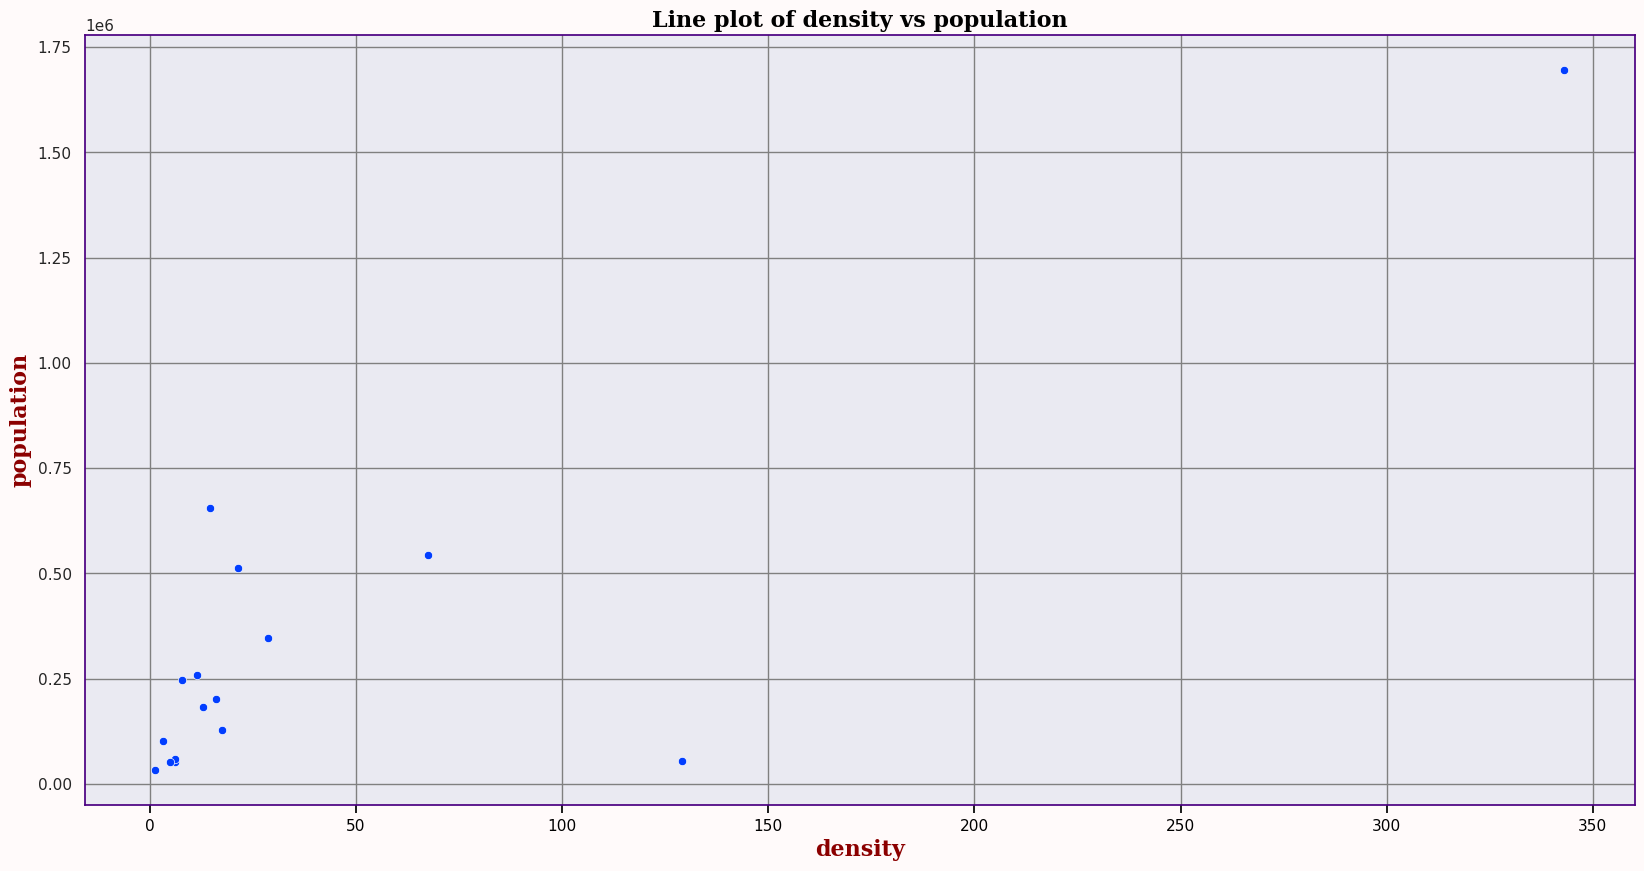

In [313]:
plotting_scatter(location_featured,'density','population')

**Observations**
- Top five locations with high population are;
    - Auckland
    - Canterbury
    - Wellington
    - Waikato
    - Bay of Plenty
- Top five locations with high density are;
    - Auckland
    - Nelson
    - Wellington
    - Bay of Plenty
    - Waikato
-  Canterbury has the highest area and is the seccond most populated region, but suprisingly Auckland has a very low area $(km^2)$

- Based of the heat map, there is a strong correlation between population and population density; a higher population will have a higher population density

### **make_details**

In [293]:
make_details_cleaning = make_details.copy()

In [294]:
# checking for null values
make_details_cleaning.isna().sum()

make_id      0
make_name    0
make_type    0
dtype: int64

In [295]:
# Checking for duplicates
print(f"How many duplicates: {make_details_cleaning.duplicated().sum()}")

# # Removal of duplicates
# locations_cleaning.drop_duplicates(inplace=True)

How many duplicates: 0


In [296]:
print(f"make_details shape: {make_details_cleaning.shape}\n")
print(f"make_details dimension: {make_details_cleaning.ndim}\n")
print(f"make_details data types: \n{make_details_cleaning.dtypes}")
make_details_cleaning.head()

make_details shape: (138, 3)

make_details dimension: 2

make_details data types: 
make_id       int64
make_name    object
make_type    object
dtype: object


,make_id,make_name,make_type
0,501,Aakron Xpress,Standard
1,502,ADLY,Standard
2,503,Alpha,Standard
3,504,Anglo,Standard
4,505,Aprilia,Standard


In [297]:
make_details_cleaning.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   make_id    138 non-null    int64 
 1   make_name  138 non-null    object
 2   make_type  138 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.5 KB


In [298]:
make_details_cleaning.describe(include=np.number) # convert to int16

,make_id
count,138.000000
mean,569.500000
std,39.981246
min,501.000000
25%,535.250000
50%,569.500000
75%,603.750000
max,638.000000


In [299]:
make_details_cleaning.describe(include=np.object)

,make_name,make_type
count,138,138
unique,138,2
top,Morris,Standard
freq,1,123


**Observations**
- change make_id data type to int16
- change all objects to categories

In [300]:
make_details_memory = make_details_cleaning.copy()
make_details_memory = memory_magment(make_details_memory)

In [301]:
make_details_memory.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   make_id    138 non-null    int16   
 1   make_name  138 non-null    category
 2   make_type  138 non-null    category
dtypes: category(2), int16(1)
memory usage: 13.7 KB


- Memory has reduced from 18.5 to 13.7KB
- All target columns has been modified

In [314]:
make_details_memory.head()

,make_id,make_name,make_type
0,501,Aakron Xpress,Standard
1,502,ADLY,Standard
2,503,Alpha,Standard
3,504,Anglo,Standard
4,505,Aprilia,Standard


In [330]:
make_details_featured = make_details_memory.copy()

In [331]:
cat_columns = make_details_featured.select_dtypes(include=pd.CategoricalDtype)
cat_columns
for column in cat_columns:
    print(f"These are the values in the {column} column:\n{make_details_featured[column].unique().tolist()}\n")
    print(f"This is the total values present in the: {column} column:\n{make_details_featured[column].nunique()}\n")

These are the values in the make_name column:
['Aakron Xpress', 'ADLY', 'Alpha', 'Anglo', 'Aprilia', 'Atlas', 'Audi', 'Bailey', 'Bedford', 'Benelli', 'Bentley', 'BMW', 'Bricon', 'Briford', 'Buell', 'Buffalo', 'Cadillac', 'Can-Am', 'Caravan', 'Caterpillar', 'Chery', 'Chevrolet', 'Chrysler', 'Citroen', 'Classic', 'Crusader', 'Custombuilt', 'Dacia', 'Daewoo', 'DAF', 'Daihatsu', 'Diamond', 'DMW', 'Dodge', 'Domett', 'Ducati', 'Elddis', 'Factory Built', 'Ferrari', 'Ford', 'Forza', 'FOTON', 'Fuso', 'Great Wall', 'Harley Davidson', 'Hino', 'Hitachi', 'Holden', 'Homebuilt', 'Honda', 'Hoskings', 'Husaberg', 'Husqvarna', 'Hyosung', 'Hyundai', 'Isuzu', 'Jaguar', 'Jayco', 'Jeep', 'John Deere', 'Kawasaki', 'Kea', 'Keeway', 'Kia', 'KTM', 'Kymco', 'Lambretta', 'Land Rover', 'Landrover', 'Lexus', 'Liteweight', 'Lochiel', 'Mahindra', 'Maserati', 'Massey', 'Mazda', 'Mercedes-Benz', 'MG', 'Mini', 'Mitsubishi', 'Mitsubishio Fuso', 'Mobile Machine', 'Moden', 'Mono - Way', 'Moped', 'Morris', 'Nissan', 'Nissa

**For EDA**
- Make use of count plot for the visualisation of make_type

In [351]:
make_type_count = make_details_featured.groupby('make_type')['make_type'].agg(
    [
        ("make_type_count",'count')
    ]
).reset_index()

In [369]:
make_type_count

,make_type,make_type_count
0,Luxury,15
1,Standard,123


In [818]:
# a good version
def plotting_count(data:pd.DataFrame,x:str,hue:str=None):
    try:
        fig,ax = plt.subplots(1,figsize=(20,10),constrained_layout=True)
        sns.set_theme(style='whitegrid',rc=rc,palette='Set2')
        sns.countplot(data=data,x=x,hue=hue)

        ax.set_title(f"{x} count plot",fontdict=font_title)
        ax.set_xlabel(f"{x}",fontdict=font_label)
        ax.set_ylabel(f"Count",fontdict=font_label)
        
        standard = data[x].unique()[0]
        luxury =  data[x].unique()[1]
        labels = [luxury, standard]
        ax.set_xticklabels(labels=labels,rotation=90, fontsize=20)

        # this is better
        # ax.tick_params(axis='x',rotation=90,labelsize=30)
                # Displaying values on top of bars for standard deviation
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontweight='bold',fontsize=15)
    except KeyError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        data.info(memory_usage='deep')

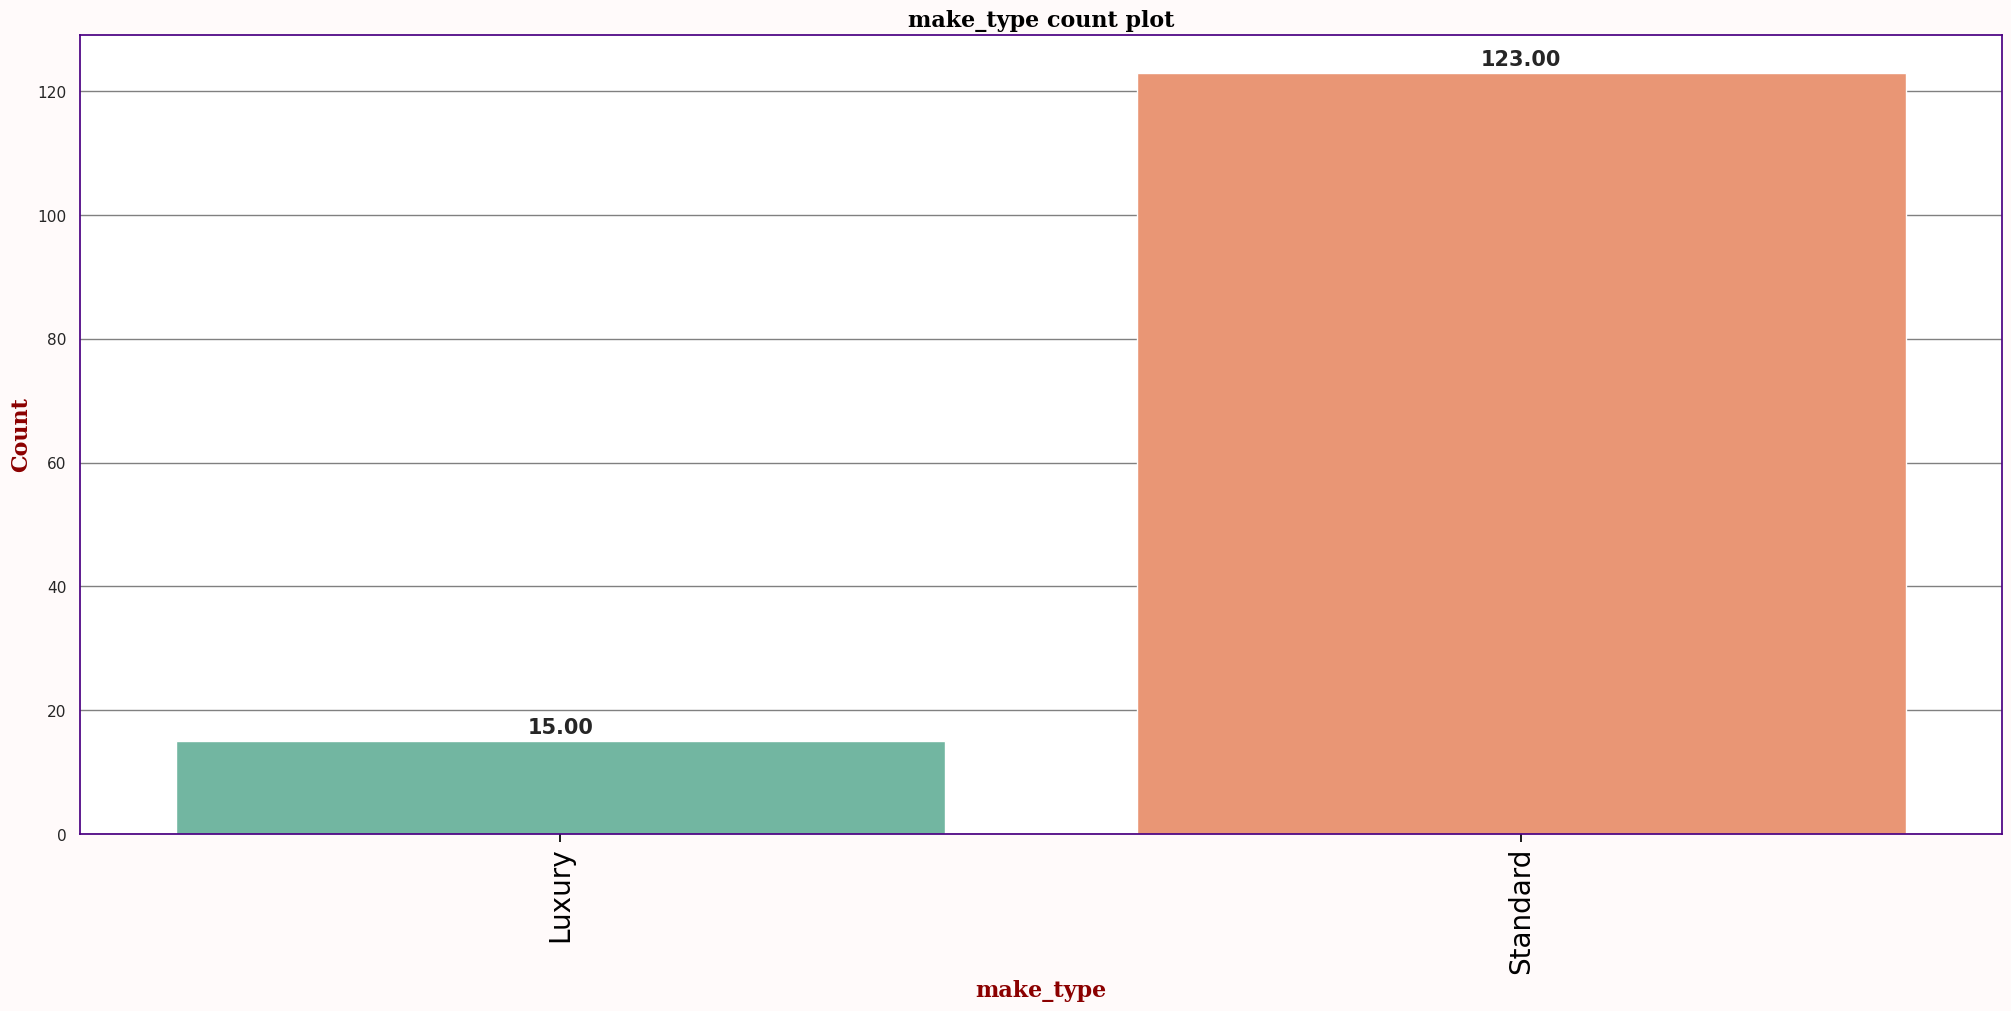

In [819]:
plotting_count(make_details_featured,'make_type')

**Observations**
- There are more Standard cars than Luxury cars

### **stolen_vehicles**

In [383]:
print(f"stolen_vehicles shape: {stolen_vehicles.shape}")
stolen_vehicles.sample(10,random_state=42)

stolen_vehicles shape: (4553, 8)


,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id
471,472,Trailer,623.0,2017.0,TRANSPORT MGE,Silver,2/28/22,103
1971,1972,Saloon,633.0,2004.0,PASSAT,Blue,10/21/21,115
23,24,Trailer - Heavy,623.0,2021.0,CT DIG 25,Silver,11/12/21,102
2702,2703,Saloon,512.0,2001.0,318I,Silver,2/27/22,102
135,136,Trailer,623.0,2019.0,HOMEBUILT,Silver,3/13/22,115
3303,3304,Hatchback,576.0,2009.0,DEMIO,Silver,3/29/22,102
3337,3338,Utility,619.0,2018.0,HILUX,Silver,11/30/21,115
4206,4207,Trailer,549.0,1994.0,TRAILER,Silver,11/4/21,107
3128,3129,Stationwagon,512.0,2007.0,320I,Silver,3/6/22,102
3262,3263,Saloon,610.0,2007.0,LEGACY,Grey,4/3/22,102


In [420]:
stolen_vehicles_cleaning = stolen_vehicles.copy()

In [421]:
print(f"stolen_vehicles shape: {stolen_vehicles_cleaning.shape}\n")
print(f"stolen_vehicles dimension: {stolen_vehicles_cleaning.ndim}\n")
print(f"stolen_vehicles data types: \n{stolen_vehicles_cleaning.dtypes}")
stolen_vehicles_cleaning.head()

stolen_vehicles shape: (4553, 8)

stolen_vehicles dimension: 2

stolen_vehicles data types: 
vehicle_id        int64
vehicle_type     object
make_id         float64
model_year      float64
vehicle_desc     object
color            object
date_stolen      object
location_id       int64
dtype: object


,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id
0,1,Trailer,623.0,2021.0,BST2021D,Silver,11/5/21,102
1,2,Boat Trailer,623.0,2021.0,OUTBACK BOATS FT470,Silver,12/13/21,105
2,3,Boat Trailer,623.0,2021.0,ASD JETSKI,Silver,2/13/22,102
3,4,Trailer,623.0,2021.0,MSC 7X4,Silver,11/13/21,106
4,5,Trailer,623.0,2018.0,D-MAX 8X5,Silver,1/10/22,102


In [422]:
stolen_vehicles_cleaning.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553 entries, 0 to 4552
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vehicle_id    4553 non-null   int64  
 1   vehicle_type  4527 non-null   object 
 2   make_id       4538 non-null   float64
 3   model_year    4538 non-null   float64
 4   vehicle_desc  4520 non-null   object 
 5   color         4538 non-null   object 
 6   date_stolen   4553 non-null   object 
 7   location_id   4553 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 1.2 MB


In [423]:
stolen_vehicles_cleaning.describe(include=np.number)

,vehicle_id,make_id,model_year,location_id
count,4553.000000,4538.000000,4538.00000,4553.000000
mean,2277.000000,584.128471,2005.23182,105.779925
std,1314.482217,35.062695,9.11763,4.686655
min,1.000000,501.000000,1940.00000,101.000000
25%,1139.000000,550.000000,2000.00000,102.000000
50%,2277.000000,587.000000,2005.00000,104.000000
75%,3415.000000,619.000000,2011.00000,109.000000
max,4553.000000,638.000000,2022.00000,116.000000


In [424]:
stolen_vehicles_cleaning.describe(include=np.object)

,vehicle_type,vehicle_desc,color,date_stolen
count,4527,4520,4538,4553
unique,25,1177,14,182
top,Stationwagon,HILUX,Silver,4/4/22
freq,945,137,1272,83


**Observations**
- It can be seen that based of the summary statistics of categorical values, there are values in vehicle_type, vehicle_desc and colour.
- Must drop missing values

In [425]:
# checking for null values
stolen_vehicles_cleaning.isna().sum()

vehicle_id       0
vehicle_type    26
make_id         15
model_year      15
vehicle_desc    33
color           15
date_stolen      0
location_id      0
dtype: int64

In [426]:
# Drop null values
stolen_vehicles_cleaning.dropna(inplace=True)
# checking for null values
stolen_vehicles_cleaning.isna().sum()

vehicle_id      0
vehicle_type    0
make_id         0
model_year      0
vehicle_desc    0
color           0
date_stolen     0
location_id     0
dtype: int64

In [427]:
stolen_vehicles_cleaning

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id
0,1,Trailer,623.0,2021.0,BST2021D,Silver,11/5/21,102
1,2,Boat Trailer,623.0,2021.0,OUTBACK BOATS FT470,Silver,12/13/21,105
2,3,Boat Trailer,623.0,2021.0,ASD JETSKI,Silver,2/13/22,102
3,4,Trailer,623.0,2021.0,MSC 7X4,Silver,11/13/21,106
4,5,Trailer,623.0,2018.0,D-MAX 8X5,Silver,1/10/22,102
...,...,...,...,...,...,...,...,...
4504,4505,Saloon,587.0,2001.0,MAXIMA,Red,3/22/22,104
4505,4506,Saloon,587.0,1995.0,CEFIRO,Green,2/15/22,104
4506,4507,Other Truck,587.0,1993.0,ATLAS,Blue,10/29/21,114
4507,4508,Light Van,580.0,2001.0,L300,White,12/9/21,101


In [428]:
print(f"stolen_vehicles shape: {stolen_vehicles_cleaning.shape}\n")
print(f"stolen_vehicles dimension: {stolen_vehicles_cleaning.ndim}\n")
print(f"stolen_vehicles data types: \n{stolen_vehicles_cleaning.dtypes}")
stolen_vehicles_cleaning.head()

stolen_vehicles shape: (4509, 8)

stolen_vehicles dimension: 2

stolen_vehicles data types: 
vehicle_id        int64
vehicle_type     object
make_id         float64
model_year      float64
vehicle_desc     object
color            object
date_stolen      object
location_id       int64
dtype: object


,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id
0,1,Trailer,623.0,2021.0,BST2021D,Silver,11/5/21,102
1,2,Boat Trailer,623.0,2021.0,OUTBACK BOATS FT470,Silver,12/13/21,105
2,3,Boat Trailer,623.0,2021.0,ASD JETSKI,Silver,2/13/22,102
3,4,Trailer,623.0,2021.0,MSC 7X4,Silver,11/13/21,106
4,5,Trailer,623.0,2018.0,D-MAX 8X5,Silver,1/10/22,102


**Observations**
- There is a change in the shape due to dropping of missing values
- Convert make_id to an int and model_year to category
- Convert all objects to categories apart from date stolen.
- date _stolen could be converted into a date type or a left as an object in a different or same data format

In [429]:
stolen_vehicles_cleaning.make_id = stolen_vehicles_cleaning.make_id.astype(np.int64)
stolen_vehicles_cleaning.make_id.dtype

dtype('int64')

In [453]:
stolen_vehicles_cleaning.model_year = stolen_vehicles_cleaning.model_year.astype(np.object)
stolen_vehicles_cleaning.dtypes

vehicle_id       int64
vehicle_type    object
make_id          int64
model_year      object
vehicle_desc    object
color           object
date_stolen     object
location_id      int64
dtype: object

In [452]:
stolen_vehicles_cleaning.model_year.dtypes

CategoricalDtype(categories=[1940.0, 1943.0, 1957.0, 1960.0, 1962.0, 1963.0, 1965.0,
                  1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0,
                  1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0,
                  1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0,
                  1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0,
                  1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0,
                  2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0,
                  2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0,
                  2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0],
, ordered=False)

In [495]:
stolen_vehicles_memory = stolen_vehicles_cleaning.copy()

stolen_vehicles_memory = memory_magment(stolen_vehicles_memory)

In [496]:
stolen_vehicles_memory.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4509 entries, 0 to 4508
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   vehicle_id    4509 non-null   int16   
 1   vehicle_type  4509 non-null   category
 2   make_id       4509 non-null   int16   
 3   model_year    4509 non-null   category
 4   vehicle_desc  4509 non-null   category
 5   color         4509 non-null   category
 6   date_stolen   4509 non-null   category
 7   location_id   4509 non-null   int8    
dtypes: category(5), int16(2), int8(1)
memory usage: 215.8 KB


In [497]:
stolen_vehicles_memory.date_stolen = stolen_vehicles_memory.date_stolen.astype(np.object)
stolen_vehicles_memory.dtypes

vehicle_id         int16
vehicle_type    category
make_id            int16
model_year      category
vehicle_desc    category
color           category
date_stolen       object
location_id         int8
dtype: object

In [498]:
stolen_vehicles_memory.model_year = stolen_vehicles_memory.model_year.astype(np.int64)
stolen_vehicles_memory.model_year = stolen_vehicles_memory.model_year.astype(np.object)
stolen_vehicles_memory.dtypes

vehicle_id         int16
vehicle_type    category
make_id            int16
model_year        object
vehicle_desc    category
color           category
date_stolen       object
location_id         int8
dtype: object

In [499]:
stolen_vehicles_memory.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4509 entries, 0 to 4508
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   vehicle_id    4509 non-null   int16   
 1   vehicle_type  4509 non-null   category
 2   make_id       4509 non-null   int16   
 3   model_year    4509 non-null   object  
 4   vehicle_desc  4509 non-null   category
 5   color         4509 non-null   category
 6   date_stolen   4509 non-null   object  
 7   location_id   4509 non-null   int8    
dtypes: category(3), int16(2), int8(1), object(2)
memory usage: 625.2 KB


**Observations**
- Memory usage reduced from 1.2MB to 625.2KB

In [500]:
stolen_vehicles_memory.head()

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id
0,1,Trailer,623,2021,BST2021D,Silver,11/5/21,102
1,2,Boat Trailer,623,2021,OUTBACK BOATS FT470,Silver,12/13/21,105
2,3,Boat Trailer,623,2021,ASD JETSKI,Silver,2/13/22,102
3,4,Trailer,623,2021,MSC 7X4,Silver,11/13/21,106
4,5,Trailer,623,2018,D-MAX 8X5,Silver,1/10/22,102


Merge on make_id and location_id, then the analysis can begin

In [501]:
stolen_vehicles_make_details_featured_merged = pd.merge(stolen_vehicles_memory,make_details_featured, on=['make_id'])
stolen_vehicles_make_details_featured_merged

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id,make_name,make_type
0,1,Trailer,623,2021,BST2021D,Silver,11/5/21,102,Trailer,Standard
1,2,Boat Trailer,623,2021,OUTBACK BOATS FT470,Silver,12/13/21,105,Trailer,Standard
2,3,Boat Trailer,623,2021,ASD JETSKI,Silver,2/13/22,102,Trailer,Standard
3,4,Trailer,623,2021,MSC 7X4,Silver,11/13/21,106,Trailer,Standard
4,5,Trailer,623,2018,D-MAX 8X5,Silver,1/10/22,102,Trailer,Standard
...,...,...,...,...,...,...,...,...,...,...
4504,3971,Hatchback,578,2021,3,Yellow,1/16/22,102,MG,Standard
4505,3985,Stationwagon,578,2021,HS,Black,3/16/22,102,MG,Standard
4506,3982,Convertible,539,1993,348 SP,Yellow,10/21/21,102,Ferrari,Luxury
4507,4056,Boat Trailer,618,2006,5M BOAT TRAILER,Grey,10/11/21,115,Toko,Standard


In [502]:
stolen_vehicles_make_details_location_featured_merged = pd.merge(stolen_vehicles_make_details_featured_merged,location_featured, on=['location_id'])
stolen_vehicles_make_details_location_featured_merged

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id,make_name,make_type,region,country,population,density,area
0,1,Trailer,623,2021,BST2021D,Silver,11/5/21,102,Trailer,Standard,Auckland,New Zealand,1695200,343.09,4940.978
1,3,Boat Trailer,623,2021,ASD JETSKI,Silver,2/13/22,102,Trailer,Standard,Auckland,New Zealand,1695200,343.09,4940.978
2,5,Trailer,623,2018,D-MAX 8X5,Silver,1/10/22,102,Trailer,Standard,Auckland,New Zealand,1695200,343.09,4940.978
3,17,Trailer,623,2021,BSTB85B,Silver,10/10/21,102,Trailer,Standard,Auckland,New Zealand,1695200,343.09,4940.978
4,24,Trailer - Heavy,623,2021,CT DIG 25,Silver,11/12/21,102,Trailer,Standard,Auckland,New Zealand,1695200,343.09,4940.978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4504,2864,Stationwagon,548,2008,COMMODORE,Red,3/6/22,116,Holden,Standard,Southland,New Zealand,102400,3.28,31219.512
4505,1611,Saloon,610,1998,IMPREZA,White,3/17/22,116,Subaru,Standard,Southland,New Zealand,102400,3.28,31219.512
4506,1614,Stationwagon,610,1996,IMPREZA,Silver,1/2/22,116,Subaru,Standard,Southland,New Zealand,102400,3.28,31219.512
4507,1645,Stationwagon,610,1997,IMPREZA,Red,12/1/21,116,Subaru,Standard,Southland,New Zealand,102400,3.28,31219.512


In [503]:
full_merged = stolen_vehicles_make_details_location_featured_merged.copy()
full_merged.sample(n=5,random_state=42)

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id,make_name,make_type,region,country,population,density,area
1995,850,Roadbike,636,2018,YZF,Blue,2/24/22,114,Yamaha,Standard,Canterbury,New Zealand,655000,14.72,44497.283
1491,4478,Stationwagon,556,1997,BIGHORN,White,4/4/22,102,Isuzu,Standard,Auckland,New Zealand,1695200,343.09,4940.978
871,1722,Saloon,576,2006,MAZDA6,Silver,1/17/22,102,Mazda,Standard,Auckland,New Zealand,1695200,343.09,4940.978
4068,4233,Utility,587,1996,NAVARA,White,3/29/22,111,Nissan,Standard,Nelson,New Zealand,54500,129.15,421.990
1102,2963,Saloon,619,2005,MARKX,Silver,4/5/22,102,Toyota,Standard,Auckland,New Zealand,1695200,343.09,4940.978


**Observatoins**
- Columns has increased from 8 to 10 and 15 columns when merging was performed

In [504]:
full_merged_cleaning = full_merged.copy()

In [505]:
print(f"full_merged shape: {full_merged_cleaning.shape}\n")
print(f"full_merged dimension: {full_merged_cleaning.ndim}\n")
print(f"full_merged data types: \n{full_merged_cleaning.dtypes}")
full_merged_cleaning.head()

full_merged shape: (4509, 15)

full_merged dimension: 2

full_merged data types: 
vehicle_id         int16
vehicle_type    category
make_id            int16
model_year        object
vehicle_desc    category
color           category
date_stolen       object
location_id         int8
make_name       category
make_type       category
region          category
country         category
population         int32
density          float64
area             float64
dtype: object


,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id,make_name,make_type,region,country,population,density,area
0,1,Trailer,623,2021,BST2021D,Silver,11/5/21,102,Trailer,Standard,Auckland,New Zealand,1695200,343.09,4940.978
1,3,Boat Trailer,623,2021,ASD JETSKI,Silver,2/13/22,102,Trailer,Standard,Auckland,New Zealand,1695200,343.09,4940.978
2,5,Trailer,623,2018,D-MAX 8X5,Silver,1/10/22,102,Trailer,Standard,Auckland,New Zealand,1695200,343.09,4940.978
3,17,Trailer,623,2021,BSTB85B,Silver,10/10/21,102,Trailer,Standard,Auckland,New Zealand,1695200,343.09,4940.978
4,24,Trailer - Heavy,623,2021,CT DIG 25,Silver,11/12/21,102,Trailer,Standard,Auckland,New Zealand,1695200,343.09,4940.978


In [507]:
full_merged_cleaning.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4509 entries, 0 to 4508
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   vehicle_id    4509 non-null   int16   
 1   vehicle_type  4509 non-null   category
 2   make_id       4509 non-null   int16   
 3   model_year    4509 non-null   object  
 4   vehicle_desc  4509 non-null   category
 5   color         4509 non-null   category
 6   date_stolen   4509 non-null   object  
 7   location_id   4509 non-null   int8    
 8   make_name     4509 non-null   category
 9   make_type     4509 non-null   category
 10  region        4509 non-null   category
 11  country       4509 non-null   category
 12  population    4509 non-null   int32   
 13  density       4509 non-null   float64 
 14  area          4509 non-null   float64 
dtypes: category(7), float64(2), int16(2), int32(1), int8(1), object(2)
memory usage: 749.9 KB


Memory is 749.9KB

In [514]:
full_merged_cleaning.describe(include=np.number)

,vehicle_id,make_id,location_id,population,density,area
count,4509.000000,4509.000000,4509.000000,4.509000e+03,4509.000000,4509.000000
mean,2255.000000,584.219117,105.784431,8.670155e+05,141.229093,15385.330322
std,1301.780511,34.991207,4.687115,6.412589e+05,152.615996,13909.942585
min,1.000000,501.000000,101.000000,5.210000e+04,3.280000,421.990000
25%,1128.000000,550.000000,102.000000,3.477000e+05,14.720000,4940.978000
50%,2255.000000,587.000000,104.000000,6.550000e+05,28.800000,8389.694000
75%,3382.000000,619.000000,109.000000,1.695200e+06,343.090000,23897.674000
max,4509.000000,638.000000,116.000000,1.695200e+06,343.090000,44497.283000


In [531]:
cond1 = full_merged_cleaning.area > 3000
cond2 = full_merged_cleaning.density > 200
cond3 = full_merged_cleaning.population > 1000000

full_cond = (cond1) & (cond2)
full_merged_cleaning.loc[full_cond,:].head()

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id,make_name,make_type,region,country,population,density,area
0,1,Trailer,623,2021,BST2021D,Silver,11/5/21,102,Trailer,Standard,Auckland,New Zealand,1695200,343.09,4940.978
1,3,Boat Trailer,623,2021,ASD JETSKI,Silver,2/13/22,102,Trailer,Standard,Auckland,New Zealand,1695200,343.09,4940.978
2,5,Trailer,623,2018,D-MAX 8X5,Silver,1/10/22,102,Trailer,Standard,Auckland,New Zealand,1695200,343.09,4940.978
3,17,Trailer,623,2021,BSTB85B,Silver,10/10/21,102,Trailer,Standard,Auckland,New Zealand,1695200,343.09,4940.978
4,24,Trailer - Heavy,623,2021,CT DIG 25,Silver,11/12/21,102,Trailer,Standard,Auckland,New Zealand,1695200,343.09,4940.978


In [512]:
full_merged_cleaning.describe(include=[np.object,pd.CategoricalDtype]).T

,count,unique,top,freq
vehicle_type,4509,25,Stationwagon,944
model_year,4509,63,2005,346
vehicle_desc,4509,1169,HILUX,137
color,4509,14,Silver,1269
date_stolen,4509,182,4/4/22,81
make_name,4509,135,Toyota,716
make_type,4509,2,Standard,4320
region,4509,13,Auckland,1620
country,4509,1,New Zealand,4509


In [543]:
# Convert date_stolen data type to datetime
full_merged_cleaning["date_stolen"] = pd.to_datetime(full_merged_cleaning['date_stolen'])

In [548]:
full_merged_cleaning.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4509 entries, 0 to 4508
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   vehicle_id    4509 non-null   int16         
 1   vehicle_type  4509 non-null   category      
 2   make_id       4509 non-null   int16         
 3   model_year    4509 non-null   object        
 4   vehicle_desc  4509 non-null   category      
 5   color         4509 non-null   category      
 6   date_stolen   4509 non-null   datetime64[ns]
 7   location_id   4509 non-null   int8          
 8   make_name     4509 non-null   category      
 9   make_type     4509 non-null   category      
 10  region        4509 non-null   category      
 11  country       4509 non-null   category      
 12  population    4509 non-null   int32         
 13  density       4509 non-null   float64       
 14  area          4509 non-null   float64       
dtypes: category(7), datetime64[ns](1), flo

Memory usage has decreased from 749.9KB to 503.1KB due to date time conversion

In [556]:
# Extracting year and month from date_stolen
full_merged_cleaning['year'] = full_merged_cleaning.date_stolen.dt.year
full_merged_cleaning.year = full_merged_cleaning.year.astype("category")
full_merged_cleaning['month'] = full_merged_cleaning.date_stolen.dt.month
full_merged_cleaning.month = full_merged_cleaning.month.astype("category")

# rename columns
column_map = {"year":"year_stolen", "month":"month_stolen"}
full_merged_cleaning.rename(columns=column_map,inplace=True)

In [557]:
full_merged_cleaning.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4509 entries, 0 to 4508
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   vehicle_id    4509 non-null   int16         
 1   vehicle_type  4509 non-null   category      
 2   make_id       4509 non-null   int16         
 3   model_year    4509 non-null   object        
 4   vehicle_desc  4509 non-null   category      
 5   color         4509 non-null   category      
 6   date_stolen   4509 non-null   datetime64[ns]
 7   location_id   4509 non-null   int8          
 8   make_name     4509 non-null   category      
 9   make_type     4509 non-null   category      
 10  region        4509 non-null   category      
 11  country       4509 non-null   category      
 12  population    4509 non-null   int32         
 13  density       4509 non-null   float64       
 14  area          4509 non-null   float64       
 15  year_stolen   4509 non-null   category

Memory usage has increased from 503.1KB to 512.4KB due to the additoin of new columns

In [558]:
# Must reorder columns
columns = full_merged_cleaning.columns.tolist()
print(columns)

['vehicle_id', 'vehicle_type', 'make_id', 'model_year', 'vehicle_desc', 'color', 'date_stolen', 'location_id', 'make_name', 'make_type', 'region', 'country', 'population', 'density', 'area', 'year_stolen', 'month_stolen']


In [562]:
full_merged_cleaning.head()

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id,make_name,make_type,region,country,population,density,area,year_stolen,month_stolen
0,1,Trailer,623,2021,BST2021D,Silver,2021-11-05,102,Trailer,Standard,Auckland,New Zealand,1695200,343.09,4940.978,2021,11
1,3,Boat Trailer,623,2021,ASD JETSKI,Silver,2022-02-13,102,Trailer,Standard,Auckland,New Zealand,1695200,343.09,4940.978,2022,2
2,5,Trailer,623,2018,D-MAX 8X5,Silver,2022-01-10,102,Trailer,Standard,Auckland,New Zealand,1695200,343.09,4940.978,2022,1
3,17,Trailer,623,2021,BSTB85B,Silver,2021-10-10,102,Trailer,Standard,Auckland,New Zealand,1695200,343.09,4940.978,2021,10
4,24,Trailer - Heavy,623,2021,CT DIG 25,Silver,2021-11-12,102,Trailer,Standard,Auckland,New Zealand,1695200,343.09,4940.978,2021,11


In [563]:
new_order = ['vehicle_id', 'vehicle_type', 'vehicle_desc',
            'make_id',"make_name", 'make_type','model_year', 'color',
            'date_stolen', 'year_stolen', 'month_stolen',
            'location_id', 'region', 'country', 
            'population', 'density', 'area', ]

full_merged_cleaning = full_merged_cleaning[new_order]

,vehicle_id,vehicle_type,vehicle_desc,make_id,make_name,make_type,model_year,color,date_stolen,year_stolen,month_stolen,location_id,region,country,population,density,area
0,1,Trailer,BST2021D,623,Trailer,Standard,2021,Silver,2021-11-05,2021,11,102,Auckland,New Zealand,1695200,343.09,4940.978
1,3,Boat Trailer,ASD JETSKI,623,Trailer,Standard,2021,Silver,2022-02-13,2022,2,102,Auckland,New Zealand,1695200,343.09,4940.978
2,5,Trailer,D-MAX 8X5,623,Trailer,Standard,2018,Silver,2022-01-10,2022,1,102,Auckland,New Zealand,1695200,343.09,4940.978
3,17,Trailer,BSTB85B,623,Trailer,Standard,2021,Silver,2021-10-10,2021,10,102,Auckland,New Zealand,1695200,343.09,4940.978
4,24,Trailer - Heavy,CT DIG 25,623,Trailer,Standard,2021,Silver,2021-11-12,2021,11,102,Auckland,New Zealand,1695200,343.09,4940.978


In [564]:
full_merged_cleaning.describe(include=[np.object,pd.CategoricalDtype]).T

,count,unique,top,freq
vehicle_type,4509,25,Stationwagon,944
vehicle_desc,4509,1169,HILUX,137
make_name,4509,135,Toyota,716
make_type,4509,2,Standard,4320
model_year,4509,63,2005,346
color,4509,14,Silver,1269
year_stolen,4509,2,2022,2860
month_stolen,4509,7,3,1046
region,4509,13,Auckland,1620
country,4509,1,New Zealand,4509


In [567]:
full_merged_featured = full_merged_cleaning.copy()

In [575]:
# full_merged_featured.month_stolen.value_counts().to_frame().reset_index().rename(columns={"index":'month'})

In [583]:
full_merged_featured.month_stolen.unique()

[11, 2, 1, 10, 12, 3, 4]
Categories (7, int64): [11, 2, 1, 10, 12, 3, 4]

In [584]:
values_to_replace = {
    11:"November",2:"Feburary",1:"January",
    10:"October",12:"December",3:"March",
    4:"April"
}
full_merged_featured.month_stolen.replace(values_to_replace,inplace=True)

In [585]:
full_merged_featured.head()

,vehicle_id,vehicle_type,vehicle_desc,make_id,make_name,make_type,model_year,color,date_stolen,year_stolen,month_stolen,location_id,region,country,population,density,area
0,1,Trailer,BST2021D,623,Trailer,Standard,2021,Silver,2021-11-05,2021,November,102,Auckland,New Zealand,1695200,343.09,4940.978
1,3,Boat Trailer,ASD JETSKI,623,Trailer,Standard,2021,Silver,2022-02-13,2022,Feburary,102,Auckland,New Zealand,1695200,343.09,4940.978
2,5,Trailer,D-MAX 8X5,623,Trailer,Standard,2018,Silver,2022-01-10,2022,January,102,Auckland,New Zealand,1695200,343.09,4940.978
3,17,Trailer,BSTB85B,623,Trailer,Standard,2021,Silver,2021-10-10,2021,October,102,Auckland,New Zealand,1695200,343.09,4940.978
4,24,Trailer - Heavy,CT DIG 25,623,Trailer,Standard,2021,Silver,2021-11-12,2021,November,102,Auckland,New Zealand,1695200,343.09,4940.978


In [589]:
num_list = full_merged_featured.select_dtypes(include=np.number).columns.tolist()
cat_list = full_merged_featured.select_dtypes(include=[np.object,'category']).columns.tolist()

In [596]:
# pop out 'vehicle_id', 'make_id' and 'location_id'
# num_list.pop(0) # do this 3 times
num_list

['population', 'density', 'area']

In [602]:
print(cat_list)
print(len(cat_list))

['vehicle_type', 'vehicle_desc', 'make_name', 'make_type', 'model_year', 'color', 'year_stolen', 'month_stolen', 'region', 'country']
10


In [591]:
def summary_stats(data,group:str,column):
    try:
        col_type = data[column].dtype
        cond = (str(col_type)[:3] == 'int') | (str(col_type)[:3] == 'flo')
        if cond:
            group_data = (
                data.groupby(group)[column].agg(
                    [
                        (f"total_{column}",'sum'),
                        (f'average_{column}','mean'),
                        (f'deviation_{column}','std'),
                        (f"skewness_level_{column}","skew")
                    ]
                ).round(3)
                .reset_index()
            )
            return group_data
        else:
            group_data = (
                data.groupby(group)[column].agg(
                    [
                        (f"count_total_{column}",'count')
                    ]
                ).reset_index()
            )
            return group_data
    except (KeyError):
        print(f"This is the list of keys: {data.columns}")

Categorical data would mostly be looked into

In [611]:
# data = summary_stats(full_merged_featured,column=cat_list[0],group='vehicle_type')
# data.sort_values(f'count_total_{cat_list[0]}',ascending=False).head()
# or
# (full_merged_featured[cat_list[0]].
#  value_counts().
#  sort_values(ascending=False).to_frame("count").reset_index().
#  rename(columns={'index':cat_list[0]})).head()

In [651]:
(full_merged_featured[cat_list[0]].
 value_counts().
 sort_values(ascending=False).to_frame("count").reset_index().
 rename(columns={'index':cat_list[0]})).head()

,vehicle_type,count
0,Stationwagon,944
1,Saloon,850
2,Hatchback,644
3,Trailer,572
4,Utility,466


In [652]:
(full_merged_featured[cat_list[1]].
 value_counts().
 sort_values(ascending=False).to_frame("count").reset_index().
 rename(columns={'index':cat_list[1]})).head()

,vehicle_desc,count
0,HILUX,137
1,COURIER,132
2,DEMIO,94
3,LEGACY,88
4,ATENZA,79


In [653]:
(full_merged_featured[cat_list[2]].
 value_counts().
 sort_values(ascending=False).to_frame("count").reset_index().
 rename(columns={'index':cat_list[2]})).head()

,make_name,count
0,Toyota,716
1,Trailer,538
2,Nissan,482
3,Mazda,433
4,Ford,312


In [654]:
(full_merged_featured[cat_list[3]].
 value_counts().
 sort_values(ascending=False).to_frame("count").reset_index().
 rename(columns={'index':cat_list[3]})).head()

,make_type,count
0,Standard,4320
1,Luxury,189


In [655]:
(full_merged_featured[cat_list[4]].
 value_counts().
 sort_values(ascending=False).to_frame("count").reset_index().
 rename(columns={'index':cat_list[4]})).head()

,model_year,count
0,2005,346
1,2006,333
2,2007,250
3,2004,238
4,2008,190


In [656]:
(full_merged_featured[cat_list[5]].
 value_counts().
 sort_values(ascending=False).to_frame("count").reset_index().
 rename(columns={'index':cat_list[5]})).head()

,color,count
0,Silver,1269
1,White,931
2,Black,585
3,Blue,510
4,Red,386


In [657]:
(full_merged_featured[cat_list[6]].
 value_counts().
 sort_values(ascending=False).to_frame("count").reset_index().
 rename(columns={'index':cat_list[6]})).head()

,year_stolen,count
0,2022,2860
1,2021,1649


In [658]:
(full_merged_featured[cat_list[7]].
 value_counts().
 sort_values(ascending=False).to_frame("count").reset_index().
 rename(columns={'index':cat_list[7]})).head()

,month_stolen,count
0,March,1046
1,Feburary,755
2,January,734
3,December,634
4,November,555


In [659]:
(full_merged_featured[cat_list[8]].
 value_counts().
 sort_values(ascending=False).to_frame("count").reset_index().
 rename(columns={'index':cat_list[8]})).head()

,region,count
0,Auckland,1620
1,Canterbury,657
2,Bay of Plenty,442
3,Wellington,417
4,Waikato,365


In [660]:
(full_merged_featured[cat_list[9]].
 value_counts().
 sort_values(ascending=False).to_frame("count").reset_index().
 rename(columns={'index':cat_list[9]})).head()

,country,count
0,New Zealand,4509


**Observations**
- **Stationwagon** is the most stolen vehicle type
- Vehicles description with **Hilux** are the most stolen
- Vehicles with a make name of **Toyota** are the most stolen
- Vehicles which are of a **Standard** make type are the most stolen
- Vehicles with model year 2005 and 2006 are the most stolen
- **Silver** coloured vehicles are the most stolen
- There was a 73.4% increase in stolen vehicles between 2021 and 2022
- Across the years with respect to month, most cars were stolen in the month of March
- **Auckland** has the most recorded stolen vehicles in the New Zealand region.

In [679]:
full_merged_eda = full_merged_featured.copy()

**Testing purposes**

In [827]:
# ordering = full_merged_eda['month_stolen'].value_counts()
# ordering.index.to_list()

In [826]:
# fig, ax = plt.subplots(1,figsize=(20,5))
# sns.countplot(data=full_merged_eda,y='month_stolen',
#             order=ordering.sort_values().index[::-1])
# ax.tick_params(axis='x',rotation=45,labelsize=20)

**End of testing**

**Plotting**

In [765]:
# a better version taken from my taxi_cab project
def plotting_count2(data:pd.DataFrame,x:str,hue:str=None):    
    try:

        fig,ax = plt.subplots(1,figsize=(20,10),constrained_layout=True)
        sns.set_theme(style='whitegrid',rc=rc,palette='Set2')

        ordering = data[x].value_counts()
        sns.countplot(data=data,x=x,hue=hue,
            order=ordering.sort_values().index[::-1], # descending order
        )
        
        ax.set_title(f"{x} count plot",fontdict=font_title)
        ax.set_xlabel(f"{x}",fontdict=font_label)
        ax.set_ylabel(f"Count",fontdict=font_label)

        ax.tick_params(axis='x', rotation=90,labelsize=20)

    except ValueError:
            print(f"The wrong Value was passed\nPlease look are the information below\n")
            data.info(memory_usage='deep')
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            data.info(memory_usage='deep')

In [767]:
# full_merged_eda.groupby('color')['color'].count().to_frame("count").reset_index()

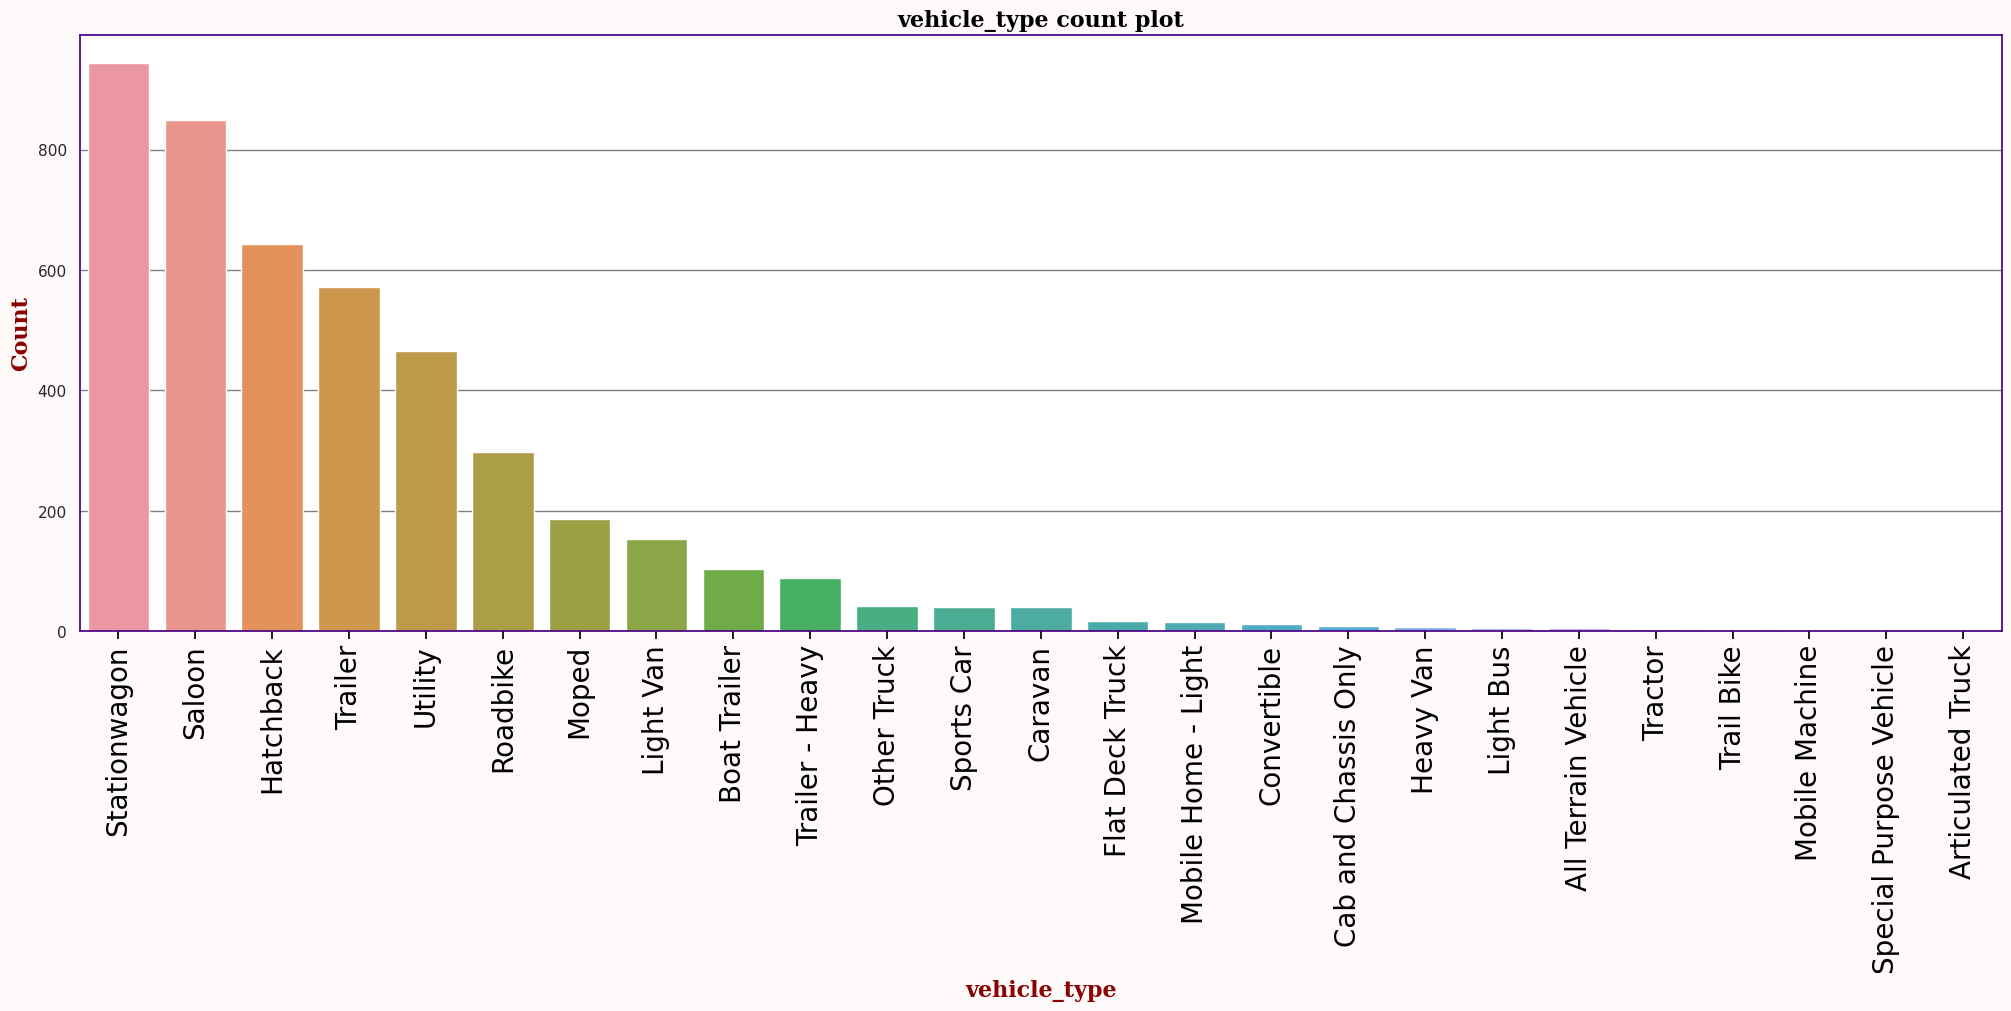

In [768]:
plotting_count2(full_merged_eda,'vehicle_type')

In [ ]:
# plotting_count2(full_merged_eda,'vehicle_desc')  # too many values

**Proposed fix**

In [800]:
top_five_vehicle_desc = (full_merged_featured[cat_list[1]].
 value_counts().
 sort_values(ascending=False).to_frame("total_count").reset_index().
 rename(columns={'index':cat_list[1]})).head()
top_five_vehicle_desc

,vehicle_desc,total_count
0,HILUX,137
1,COURIER,132
2,DEMIO,94
3,LEGACY,88
4,ATENZA,79


In [804]:
def plotting_bar2(data:pd.DataFrame,x:str,y:str,ordering=None):
    try:
        fig,ax = plt.subplots(1,figsize=(20,10),constrained_layout=True)
        sns.set_theme(style='whitegrid',rc=rc,palette='Set2')
        sns.barplot(data=data,x=x,y=y,order=None)

        ax.set_title(f"{y} bar plot",fontdict=font_title)
        ax.set_xlabel(f"Region",fontdict=font_label)
        ax.set_ylabel(f"{y}",fontdict=font_label)
        
        ax.tick_params(axis='x', rotation=90,labelsize=20)
    except KeyError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        data.info(memory_usage='deep')

In [ ]:
# plotting_bar2(top_five_vehicle_desc,x='vehicle_desc',y='total_count')

**End of proposed fix**

In [811]:
# plotting_count2(full_merged_eda,'make_name') # too many values

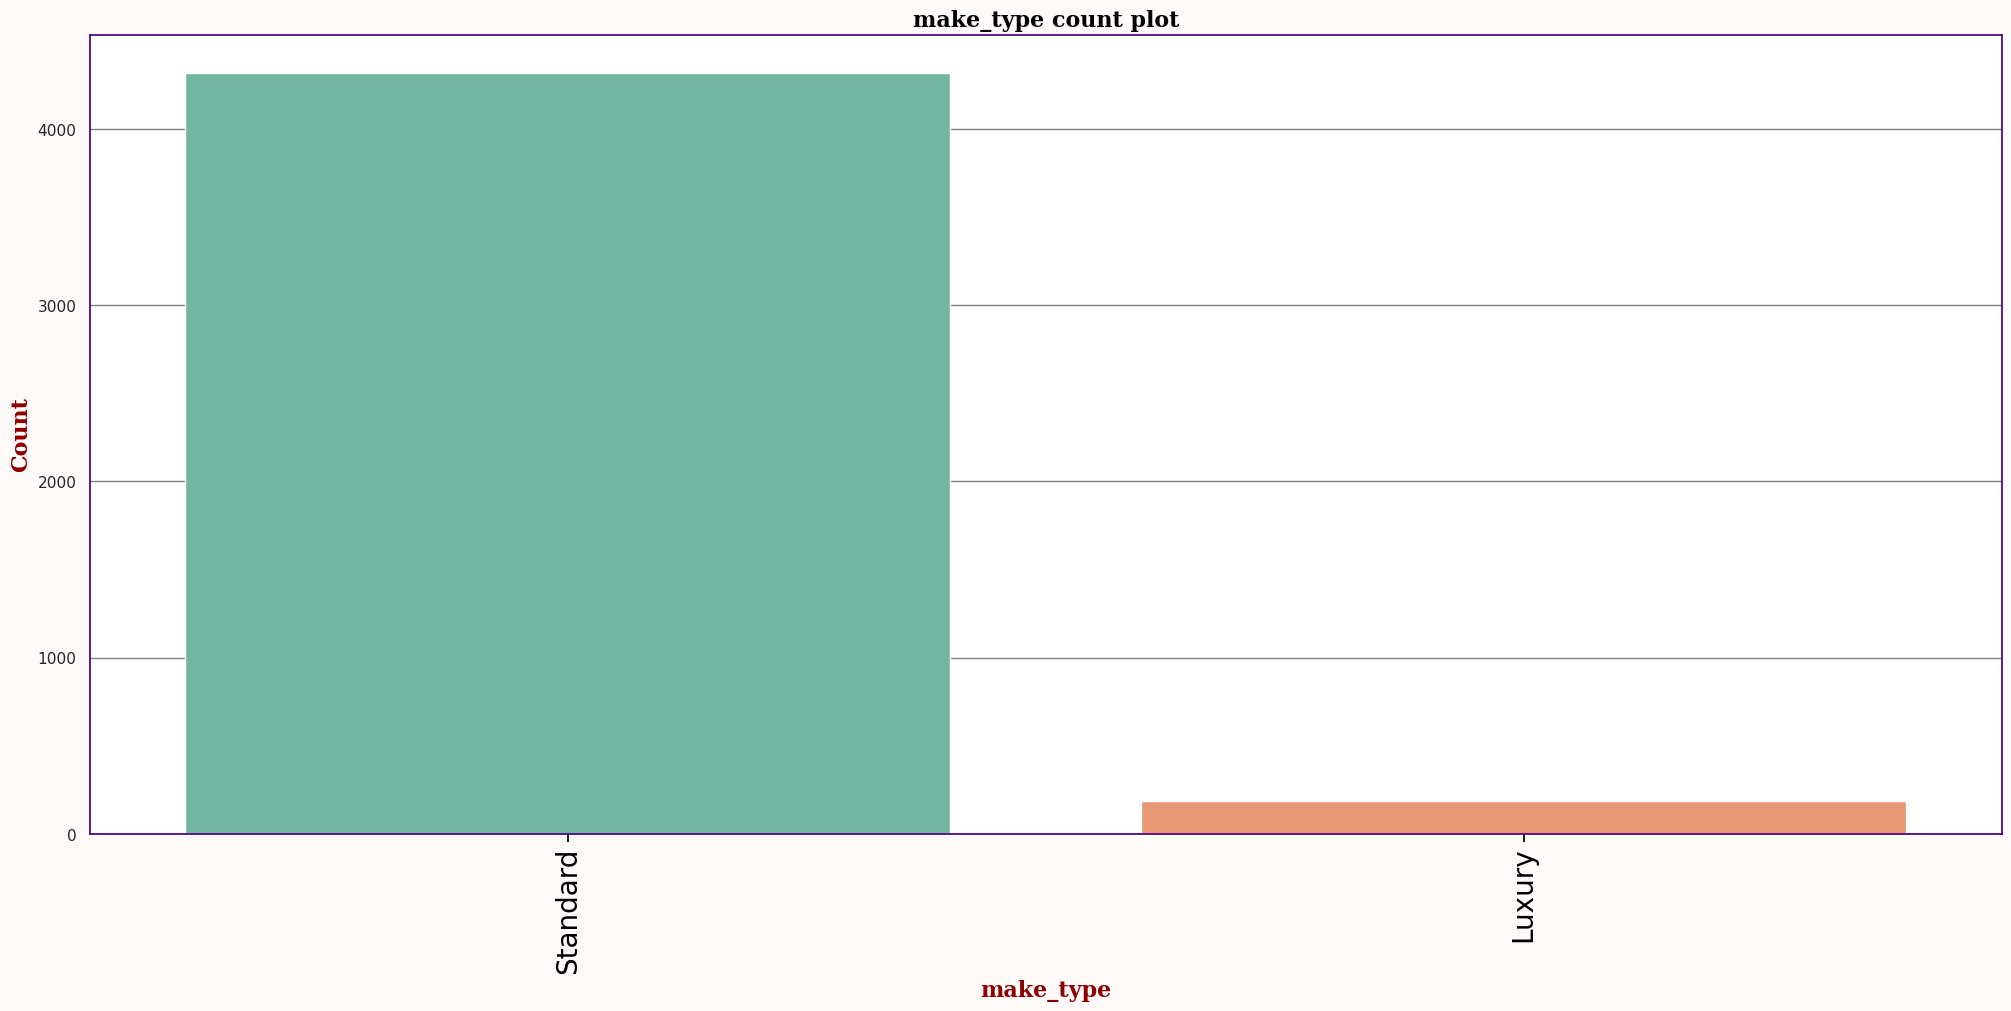

In [817]:
plotting_count2(full_merged_eda,'make_type')

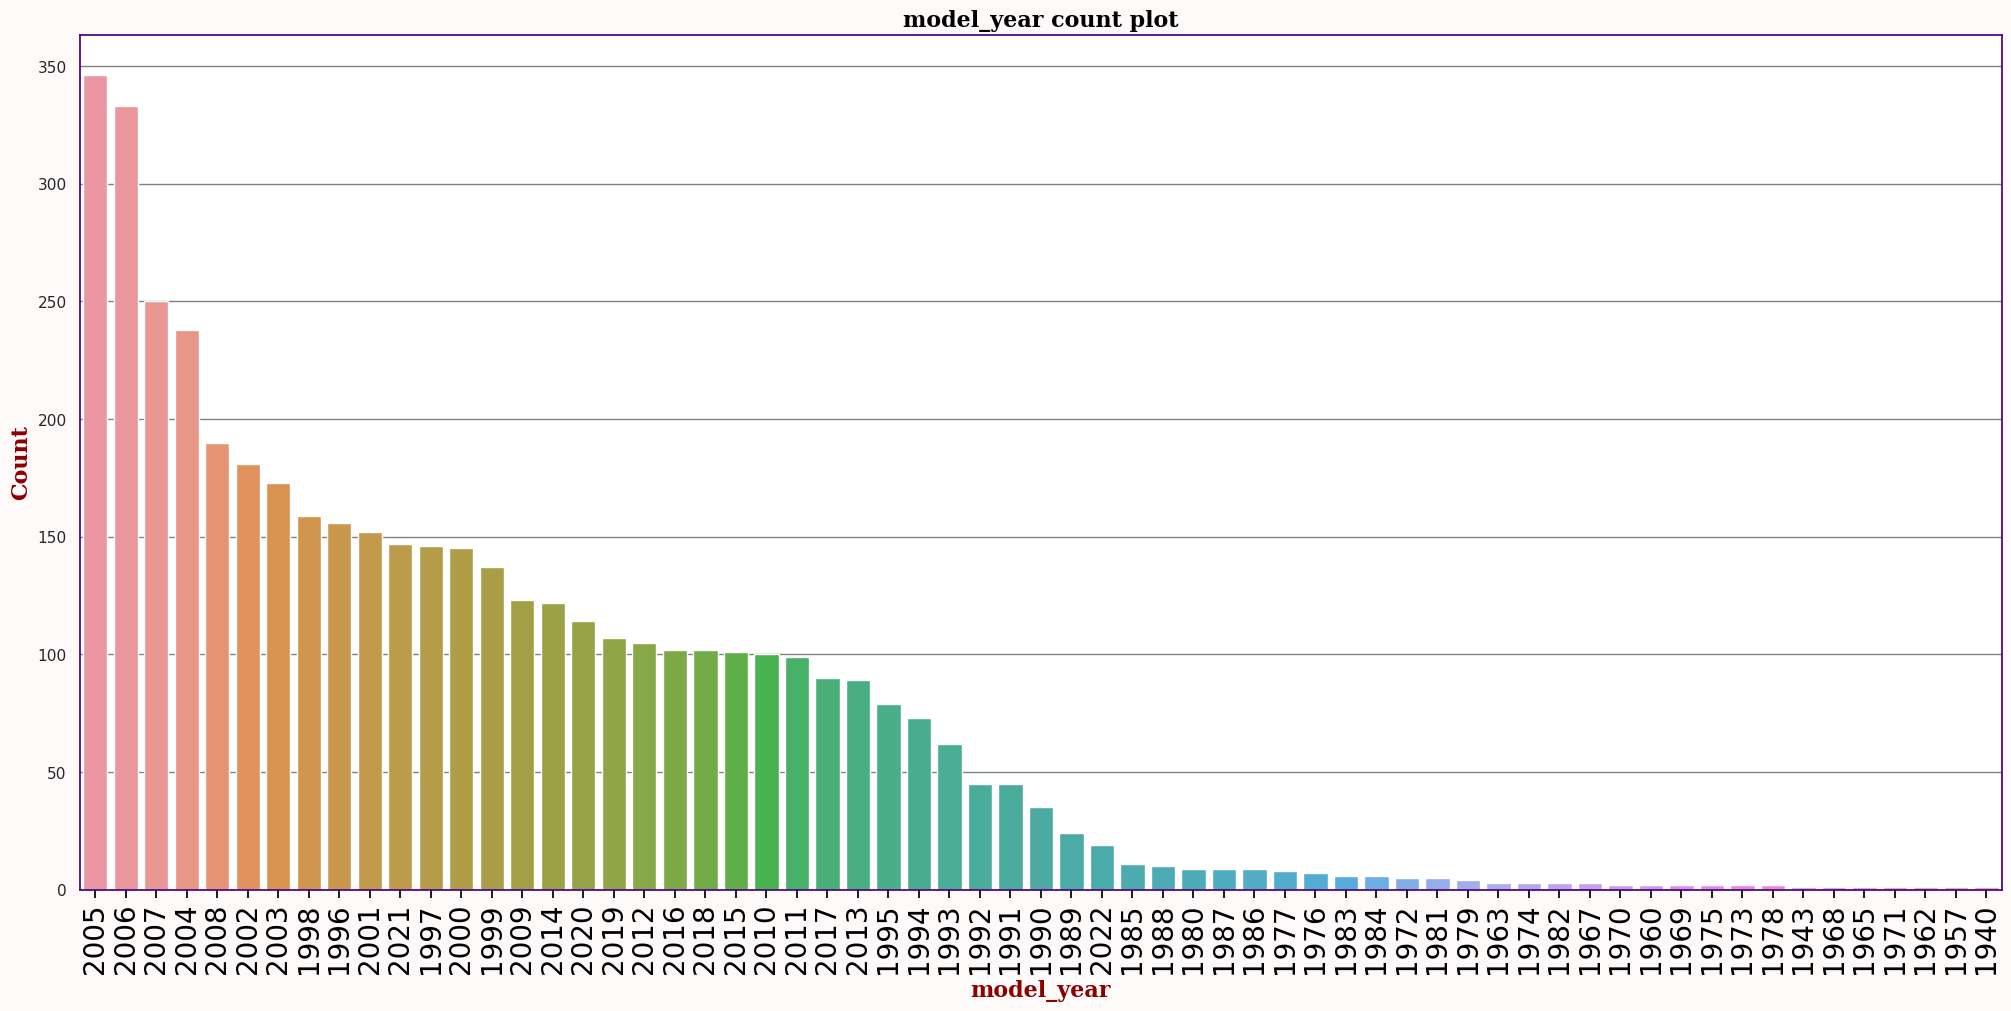

In [820]:
plotting_count2(full_merged_eda,'model_year')

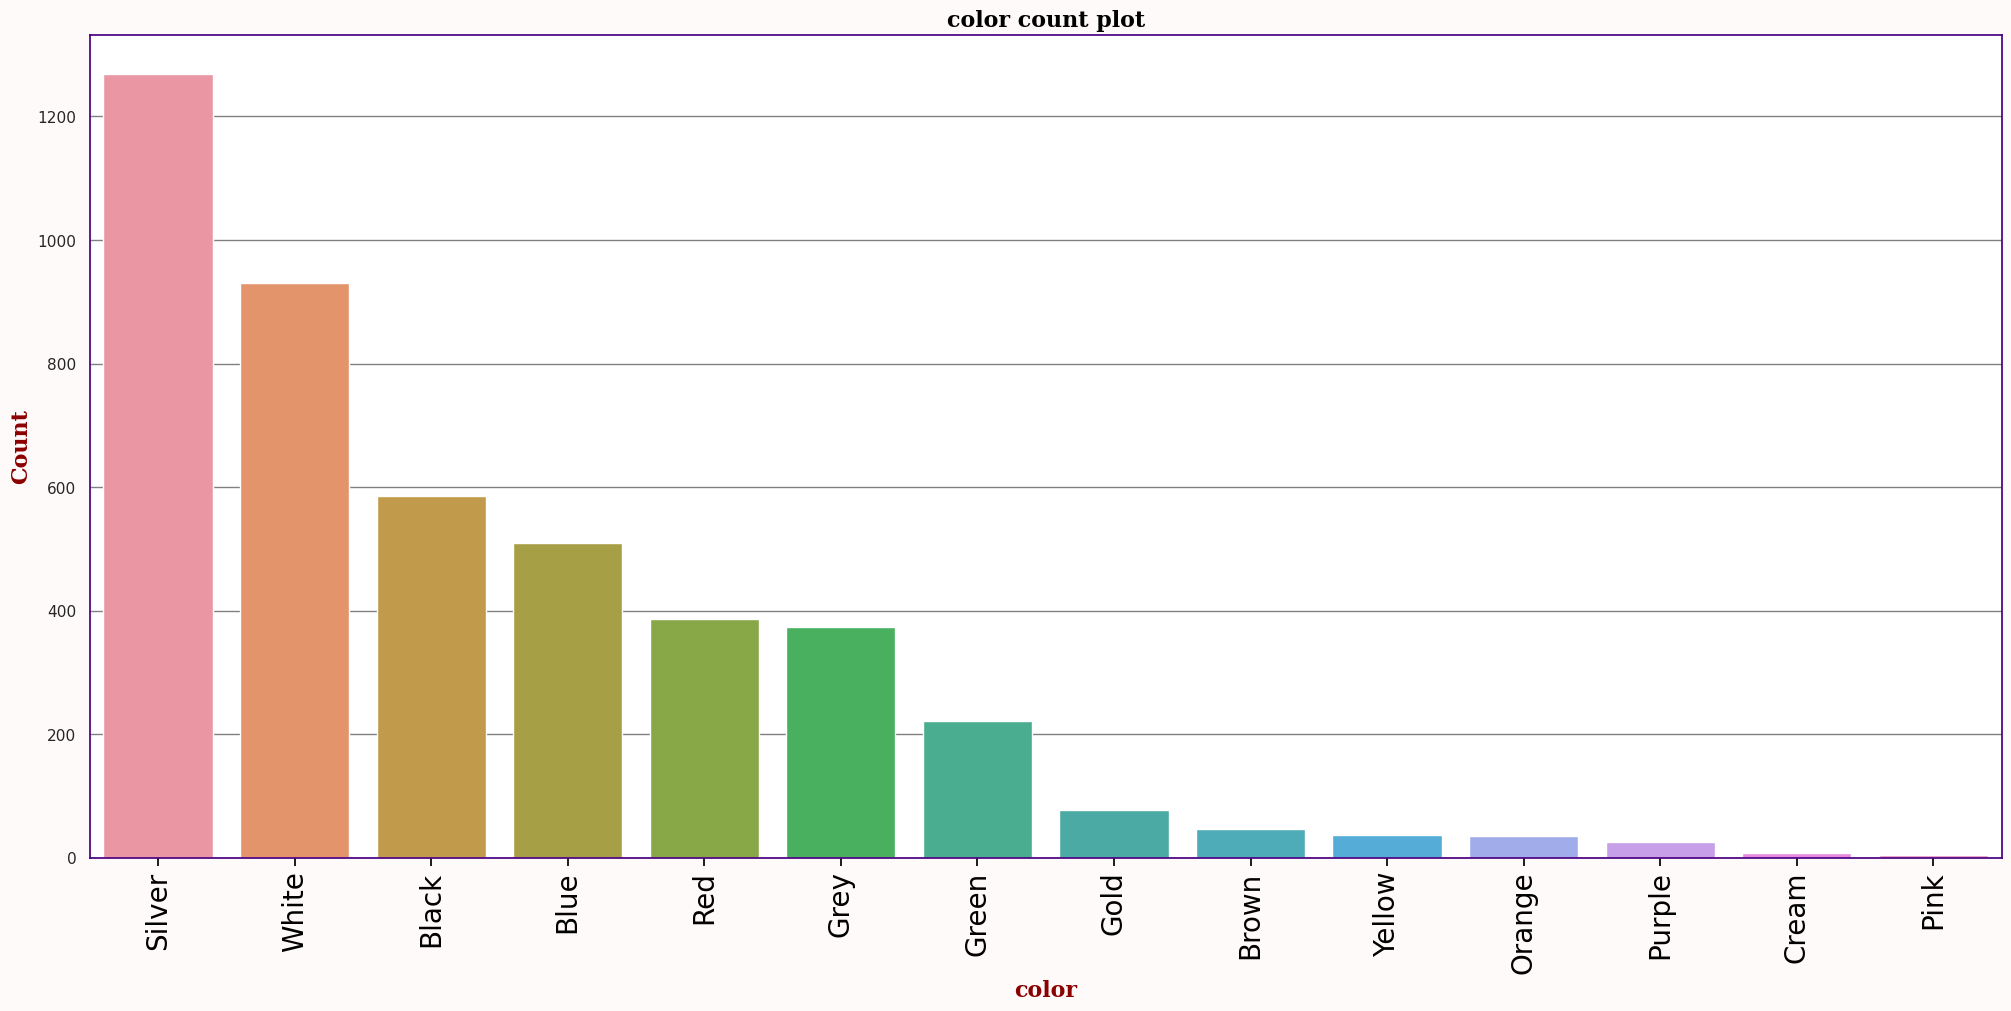

In [821]:
plotting_count2(full_merged_eda,'color')

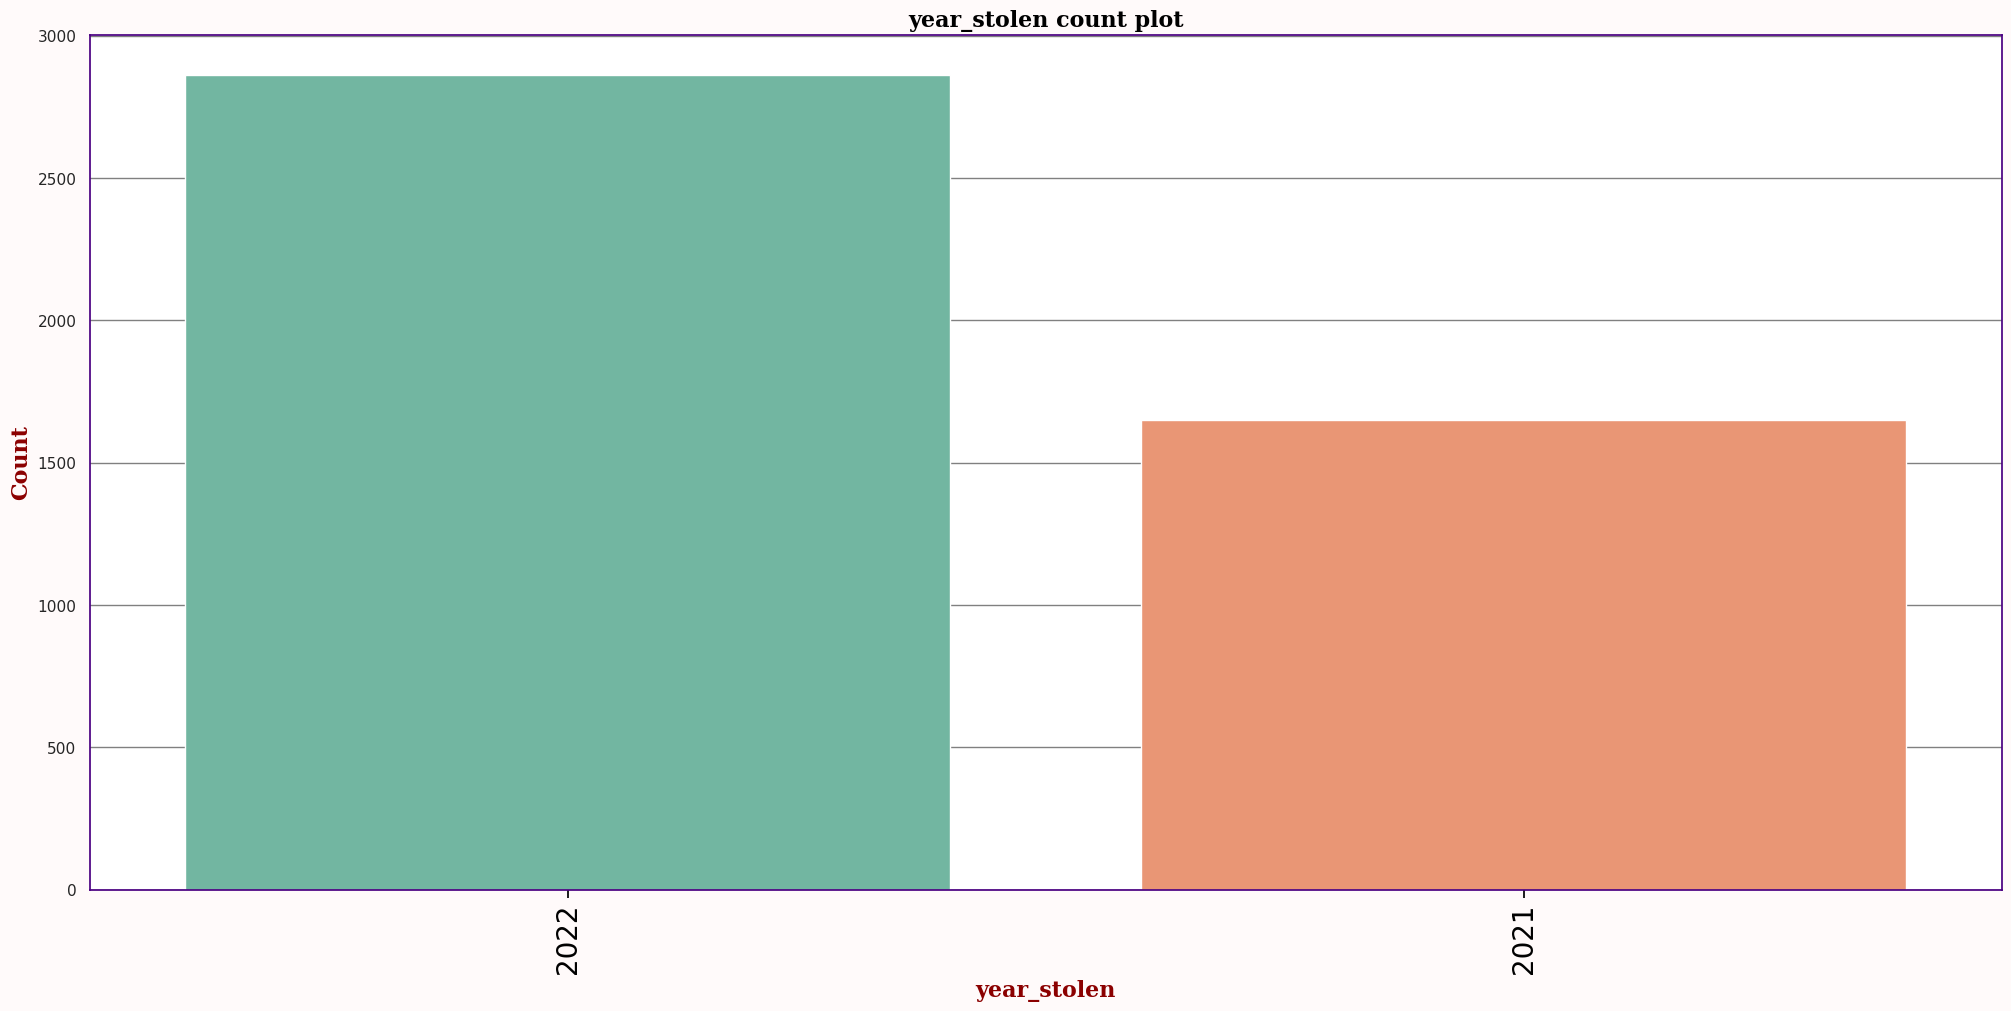

In [822]:
plotting_count2(full_merged_eda,'year_stolen')

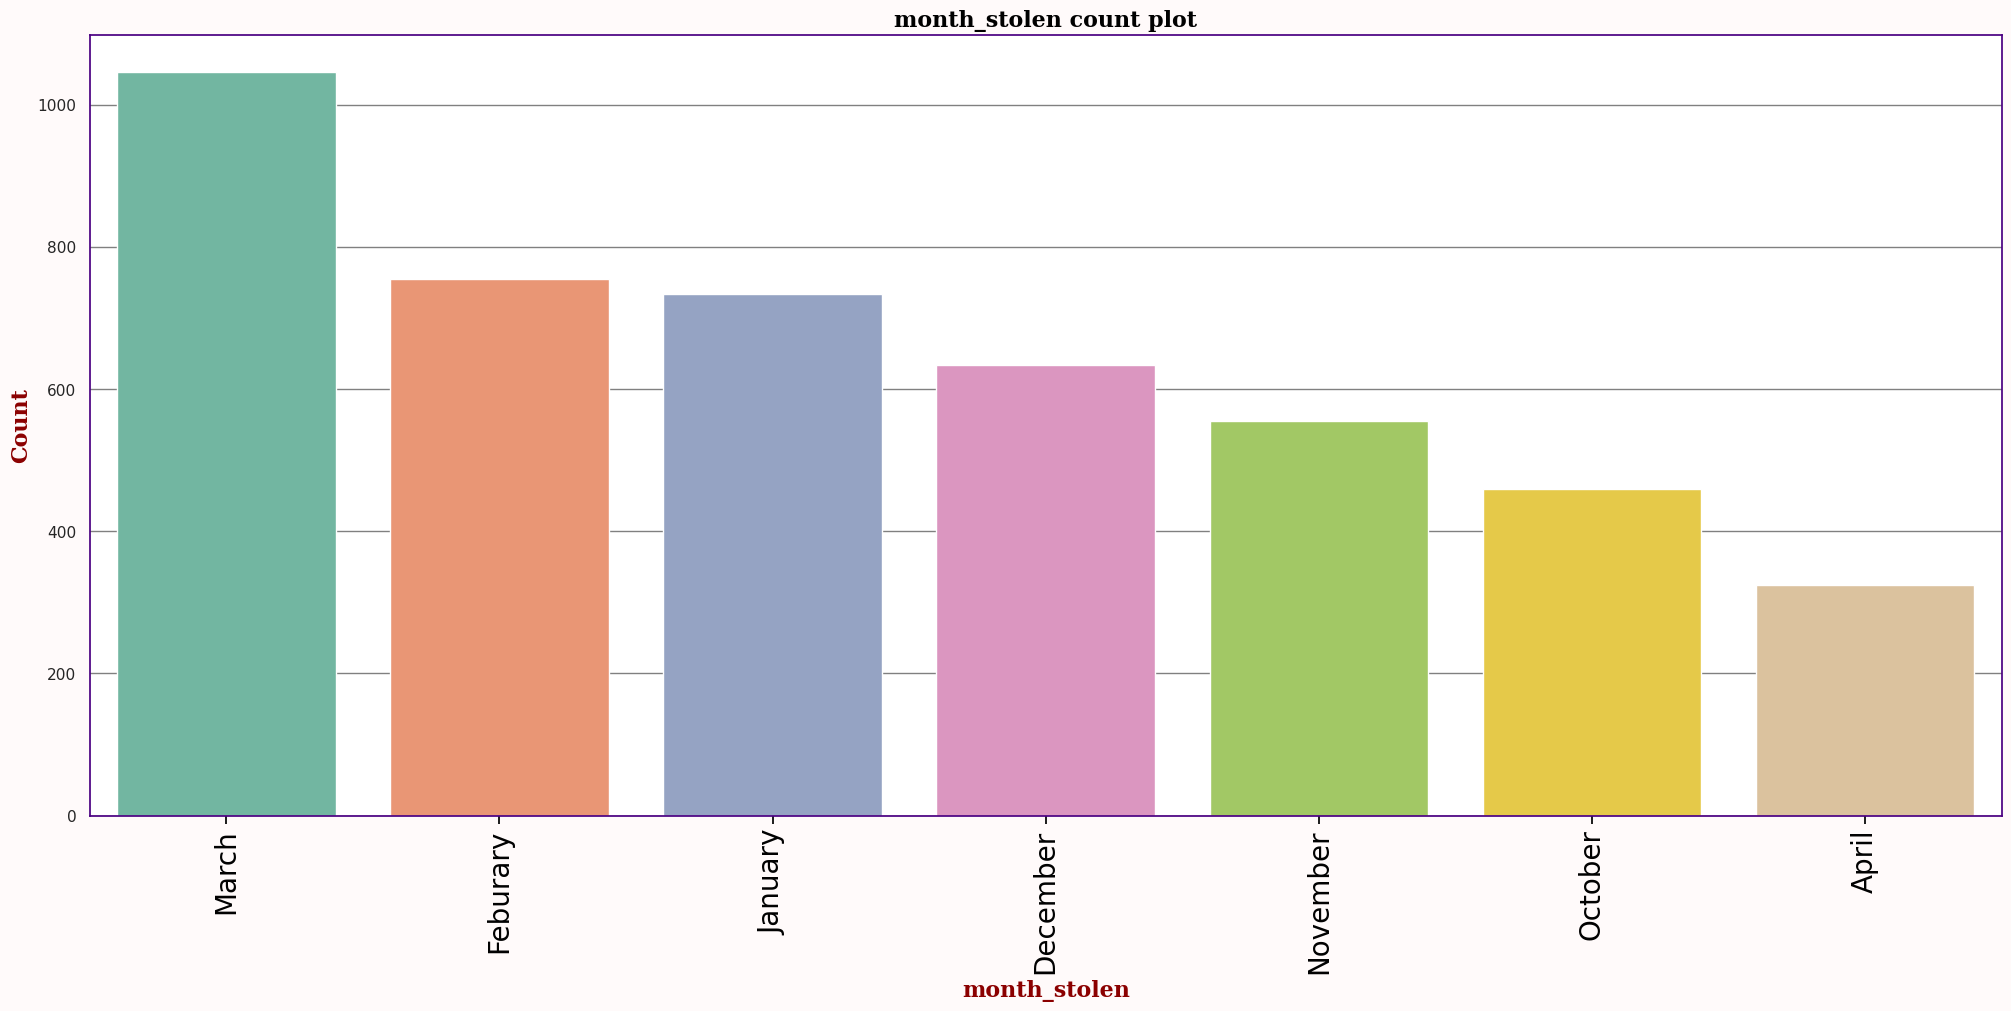

In [823]:
plotting_count2(full_merged_eda,'month_stolen')

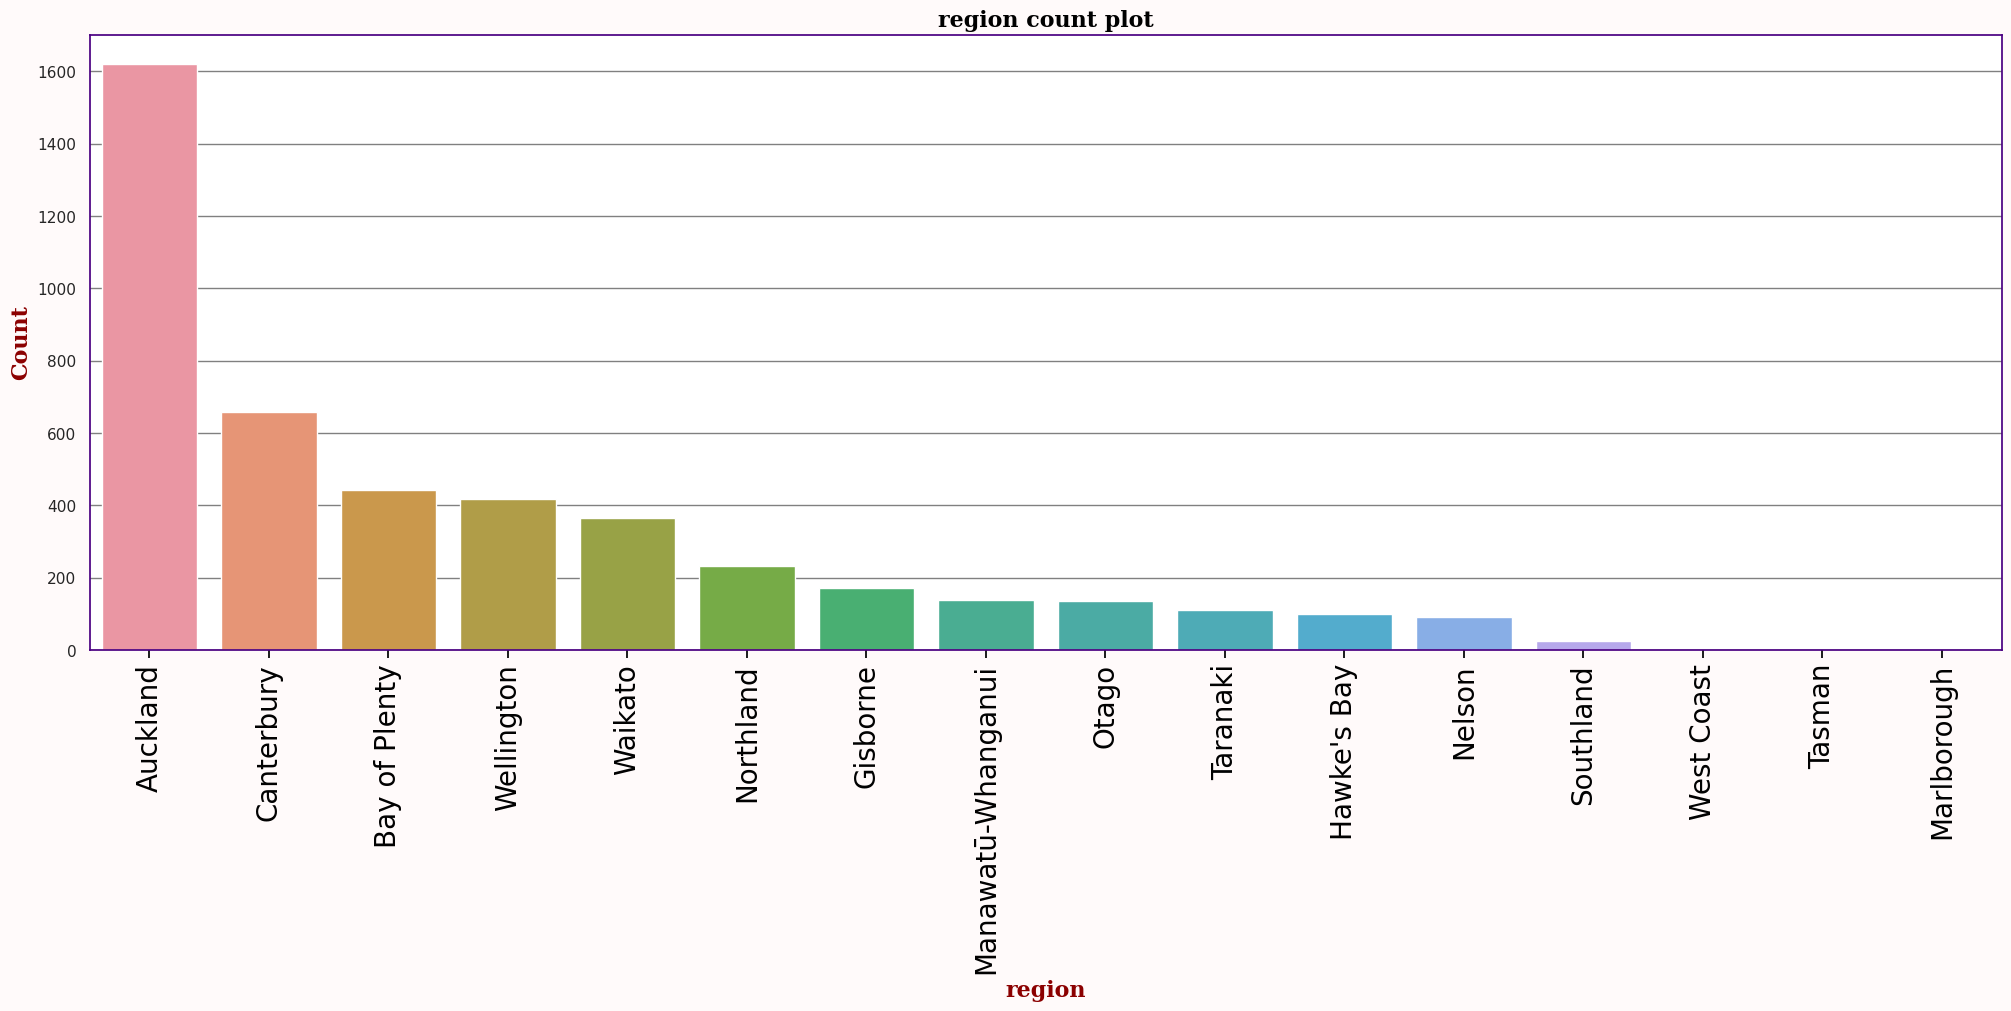

In [824]:
plotting_count2(full_merged_eda,'region')

**Further Analysis**

In [847]:
for column in cat_list:
    # print(f"These are the values in the {column} column:\n{full_merged_eda[column].unique().tolist()}\n")
    print(f"This is the total values present in the: {column} column:\n{full_merged_eda[column].nunique()}\n")

This is the total values present in the: vehicle_type column:
25

This is the total values present in the: vehicle_desc column:
1169

This is the total values present in the: make_name column:
135

This is the total values present in the: make_type column:
2

This is the total values present in the: model_year column:
63

This is the total values present in the: color column:
14

This is the total values present in the: year_stolen column:
2

This is the total values present in the: month_stolen column:
7

This is the total values present in the: region column:
13

This is the total values present in the: country column:
1



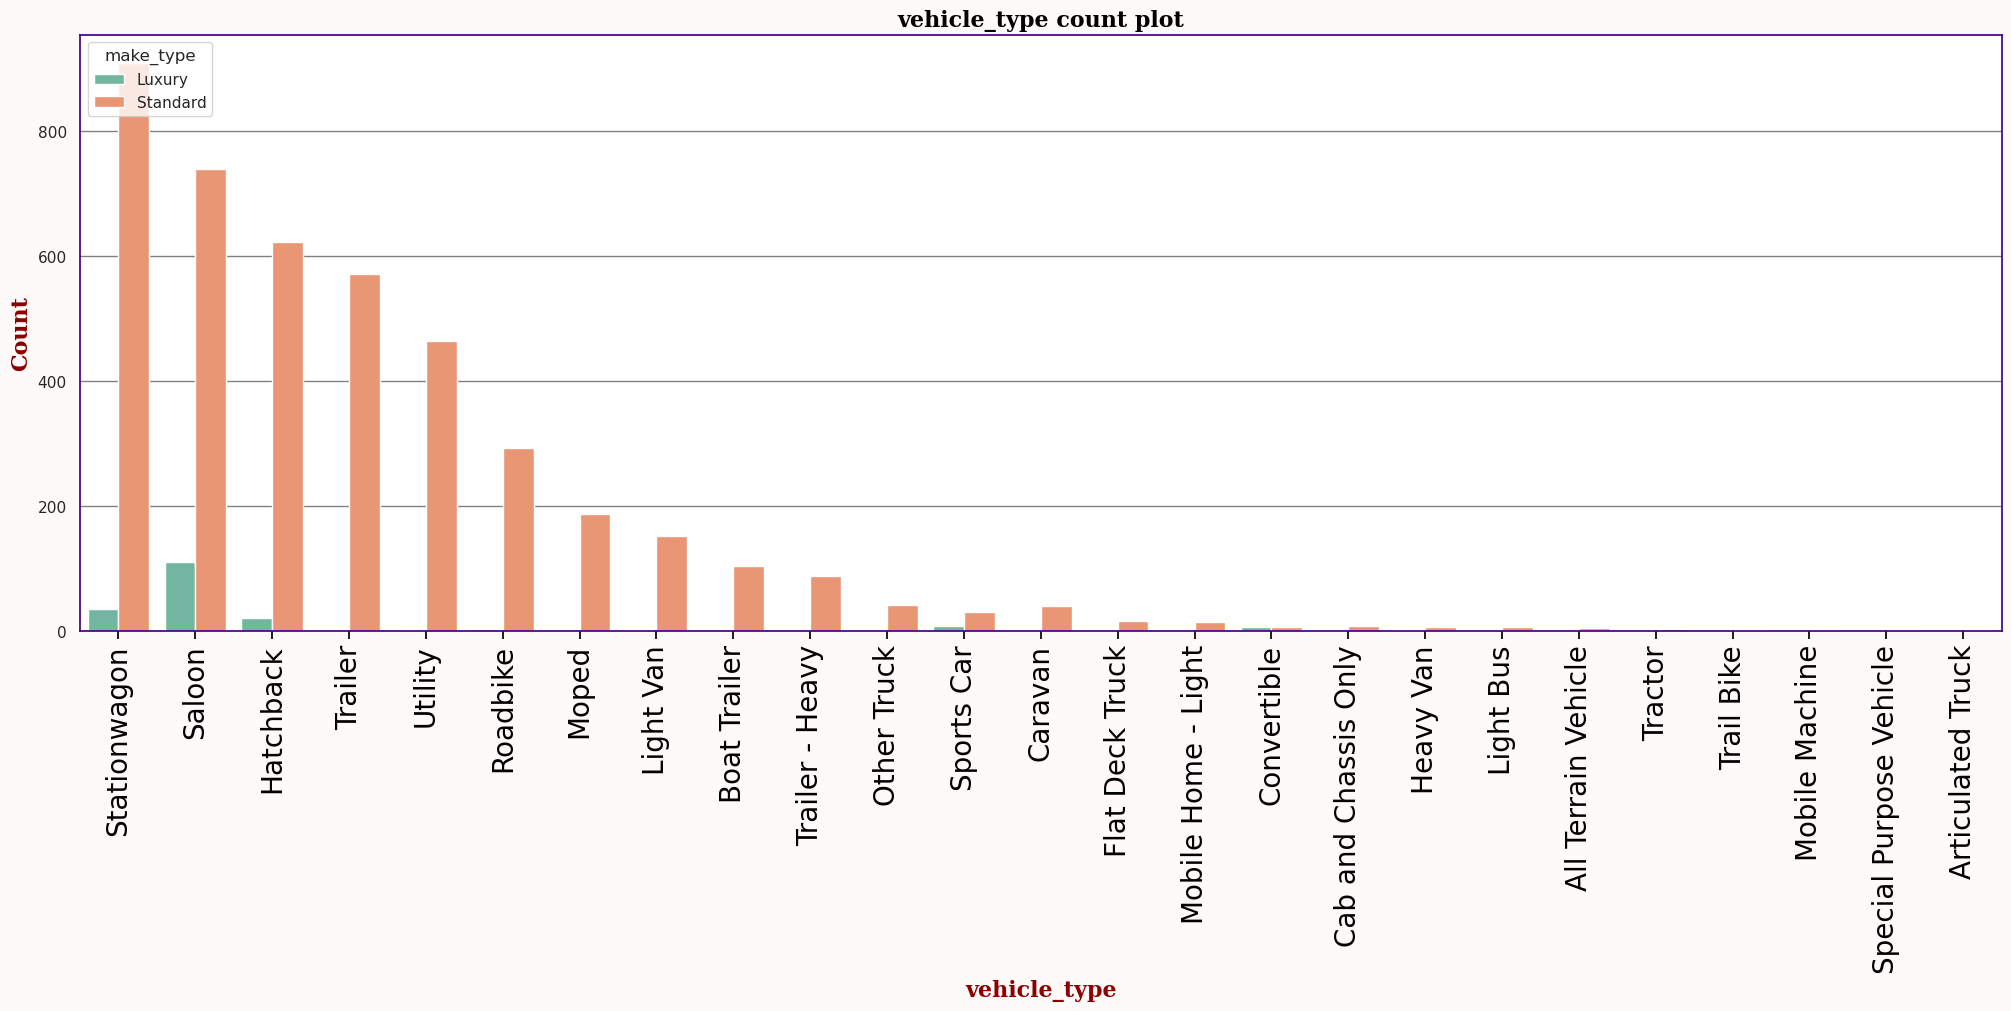

In [834]:
plotting_count2(full_merged_eda,'vehicle_type','make_type')

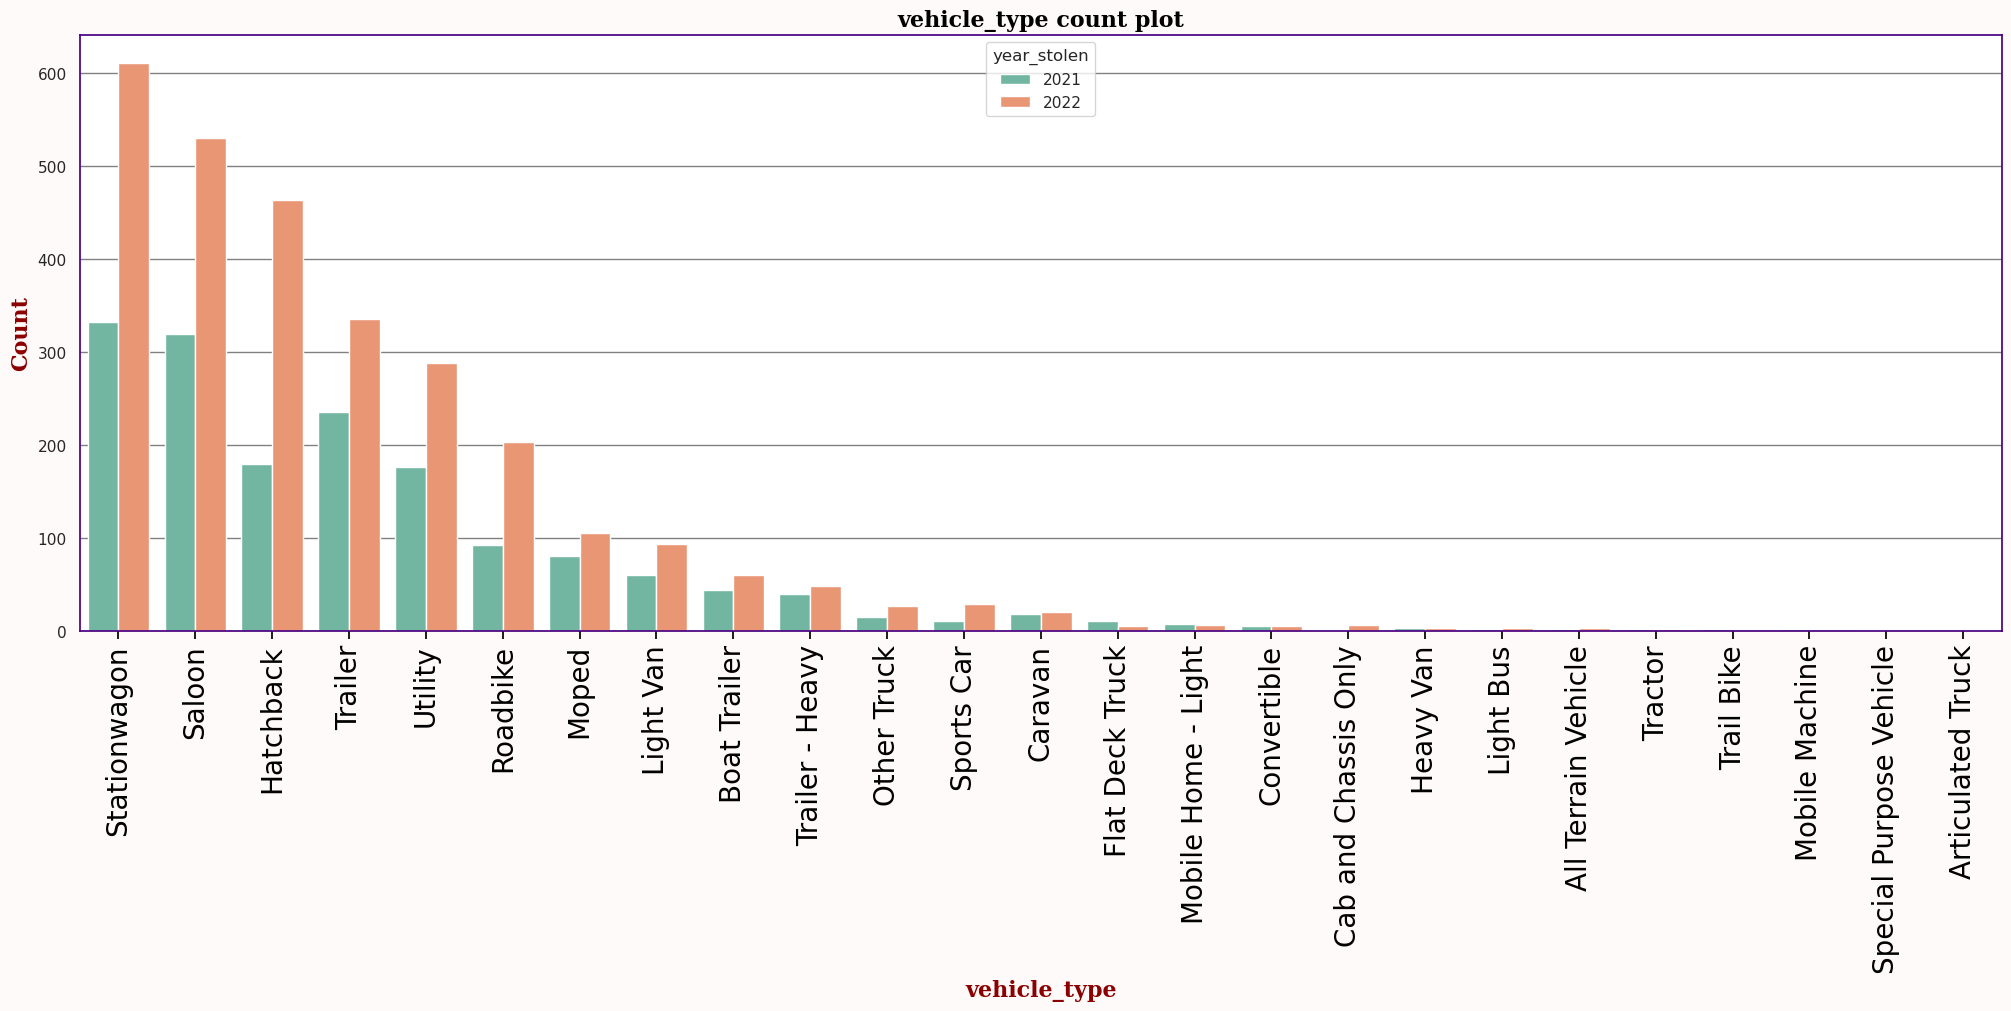

In [837]:
plotting_count2(full_merged_eda,'vehicle_type','year_stolen')

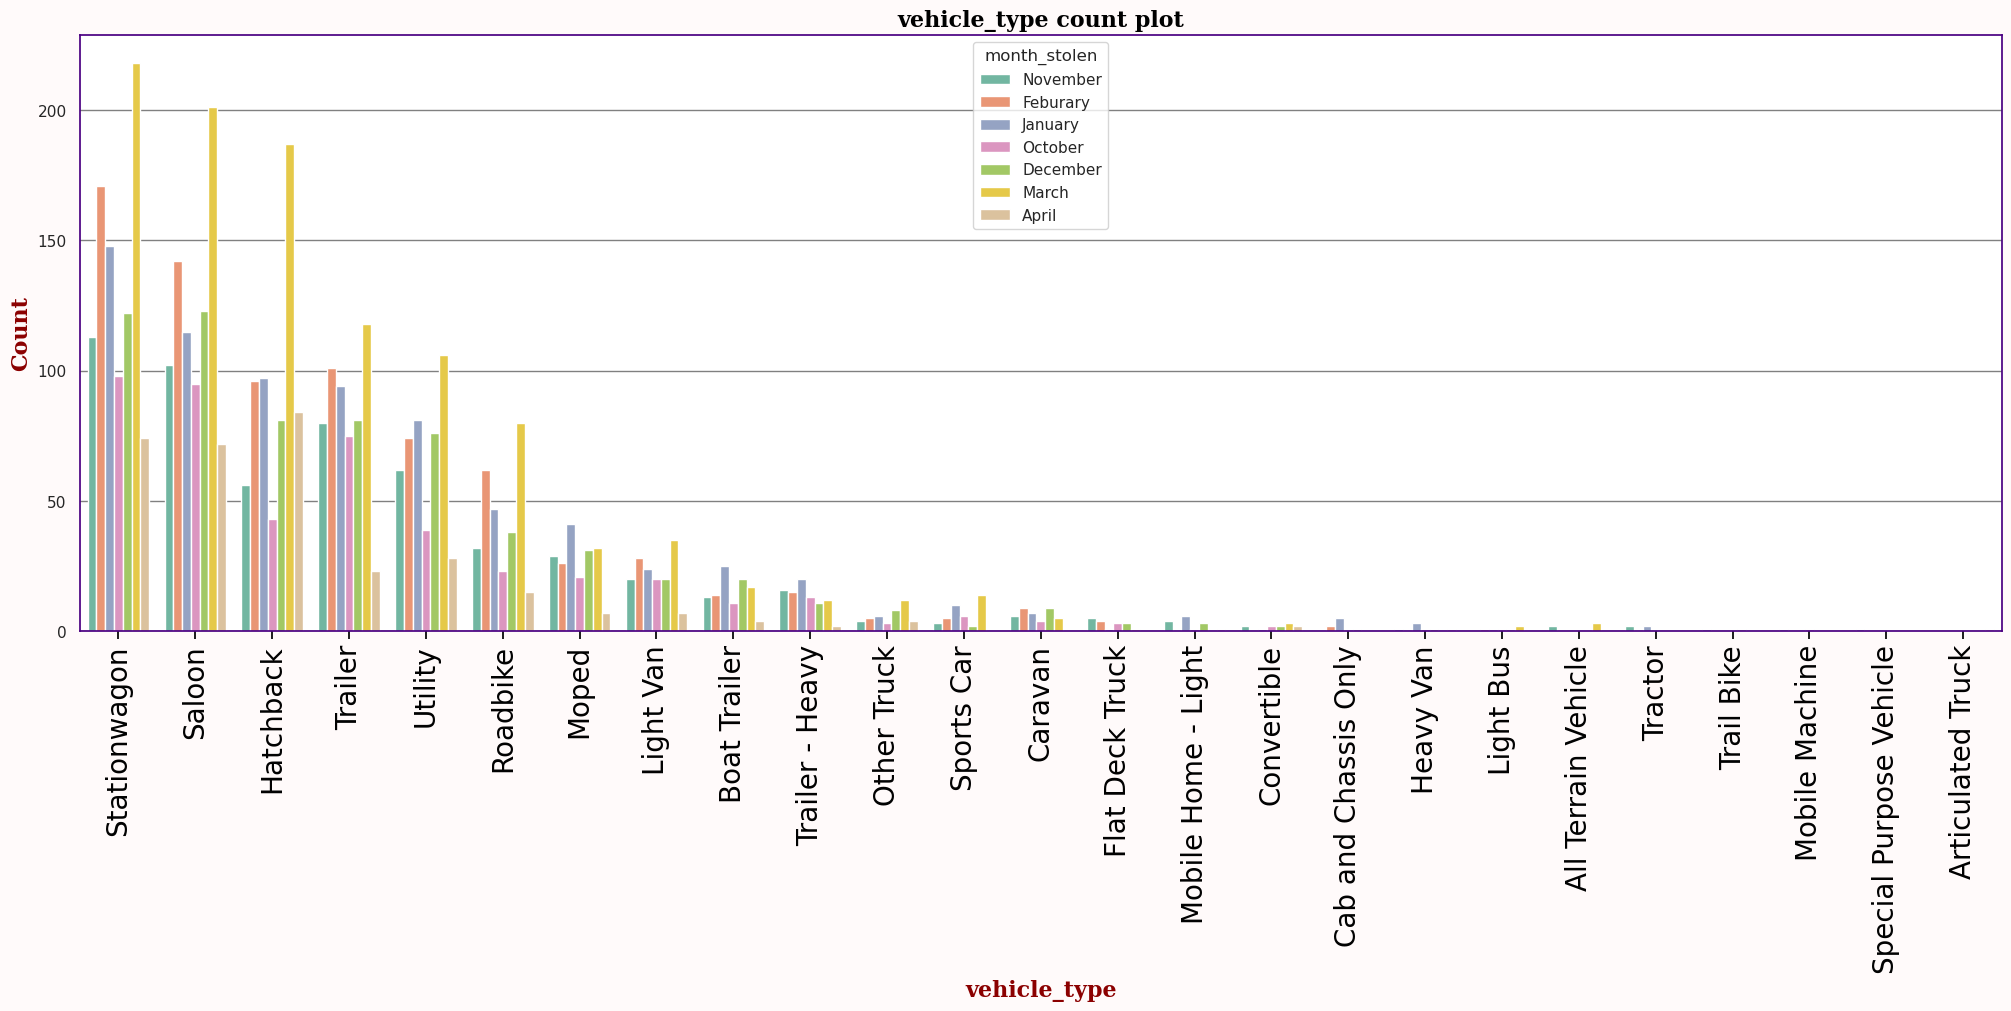

In [839]:
plotting_count2(full_merged_eda,'vehicle_type','month_stolen')

In [849]:
# plotting_count2(full_merged_eda,'vehicle_type','color')

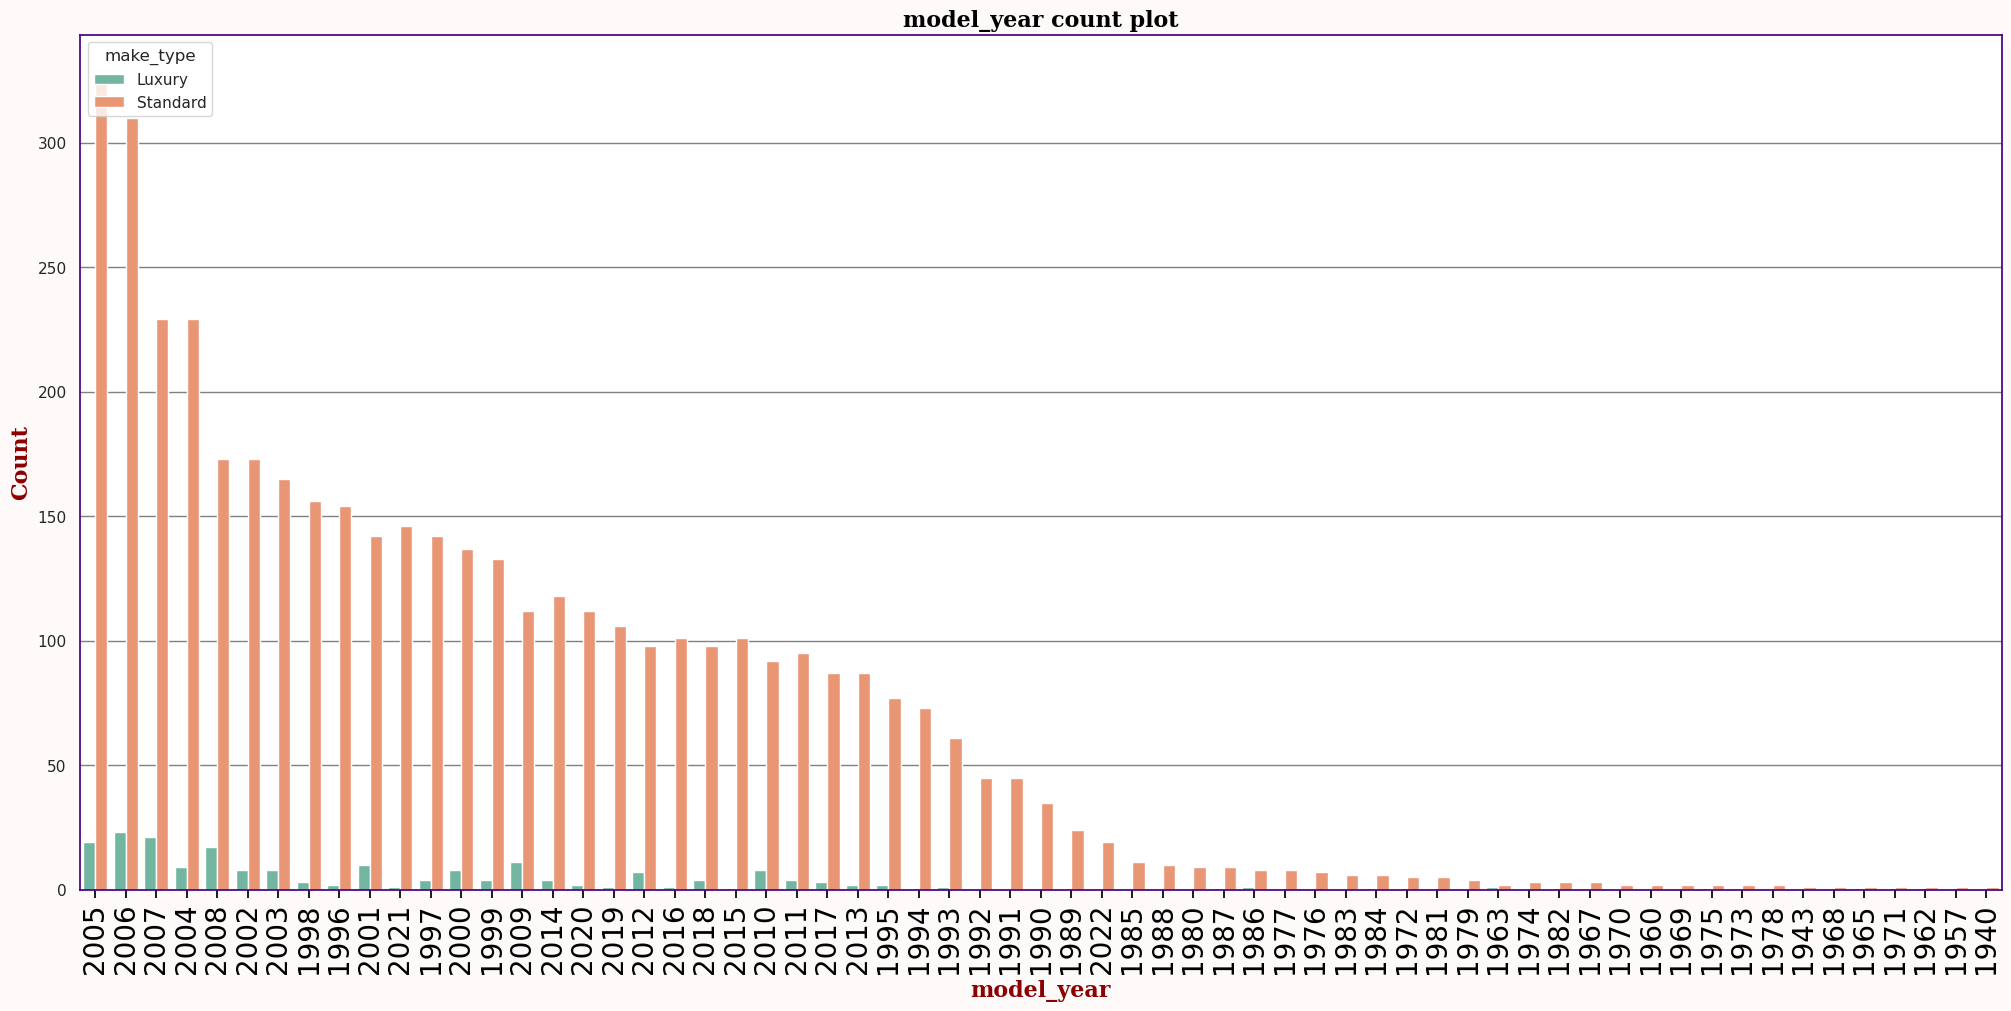

In [841]:
plotting_count2(full_merged_eda,'model_year','make_type')

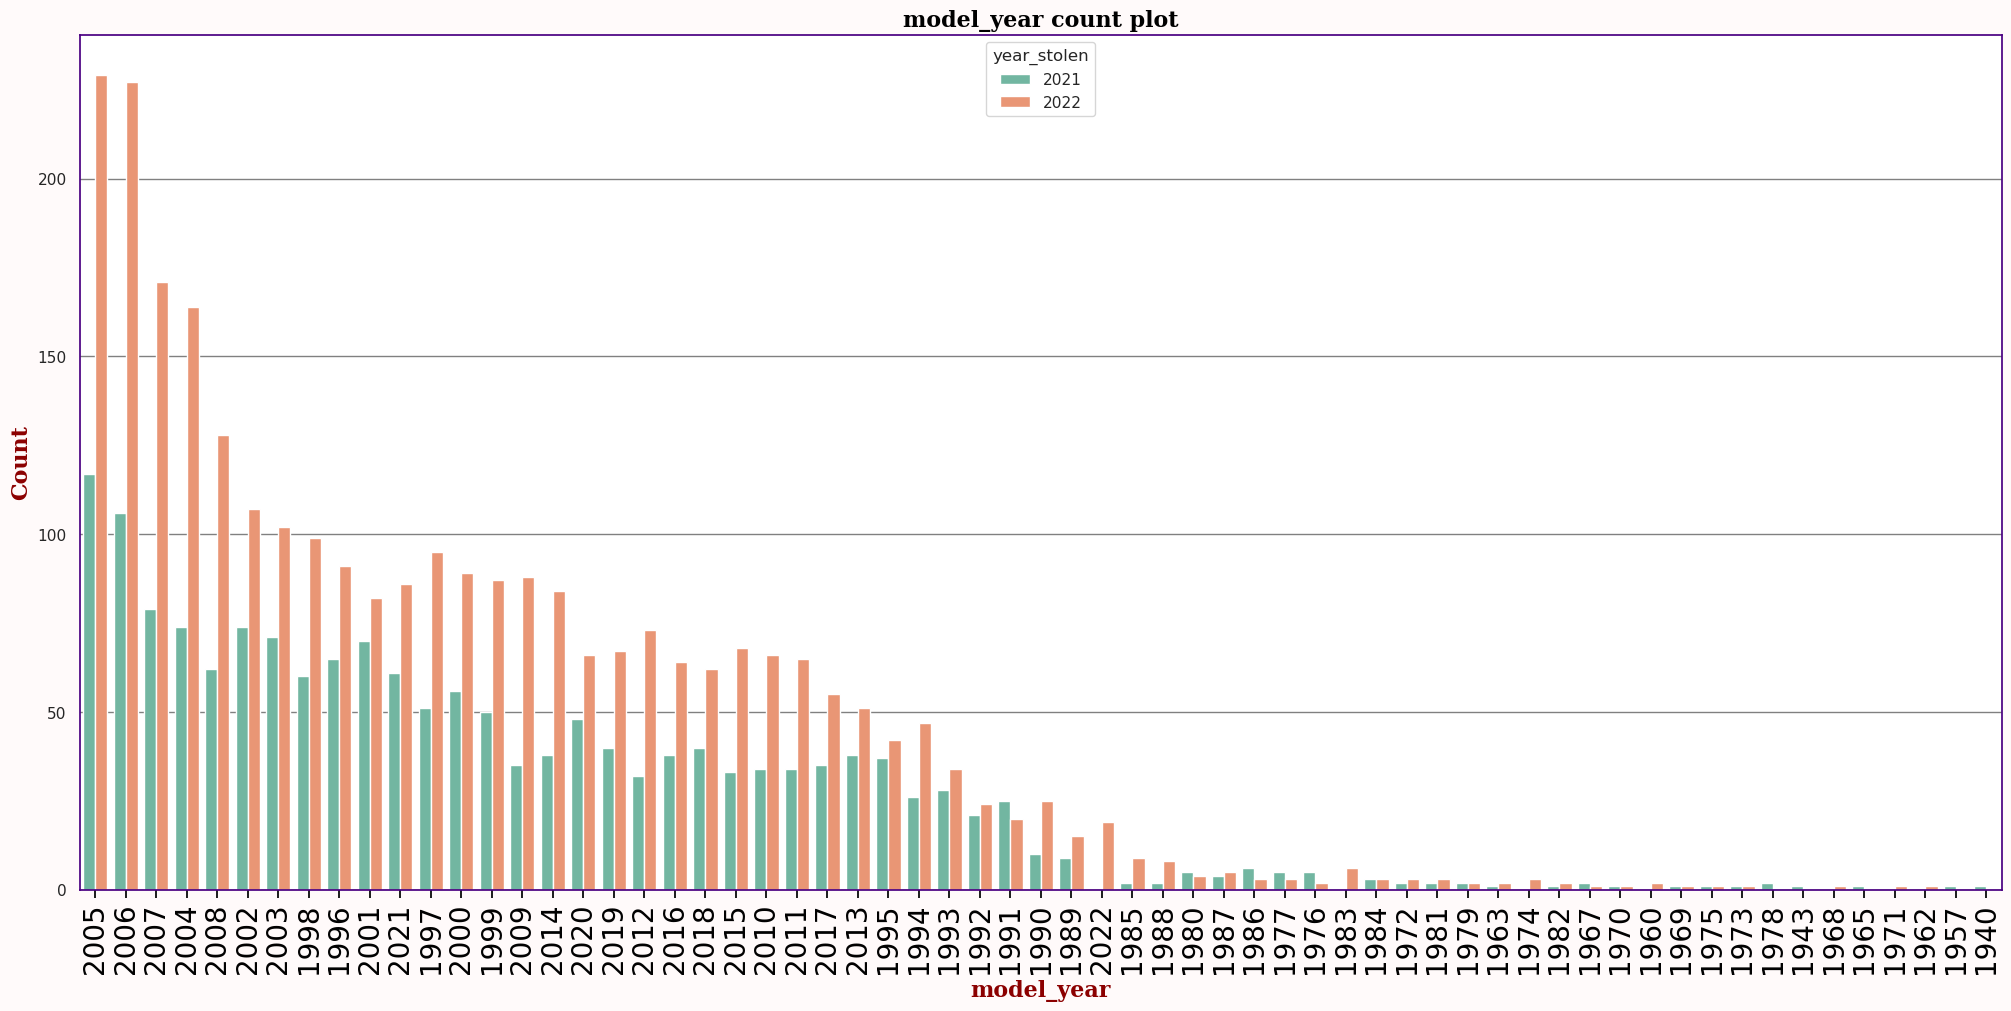

In [842]:
plotting_count2(full_merged_eda,'model_year','year_stolen')

In [844]:
# plotting_count2(full_merged_eda,'model_year','month_stolen')

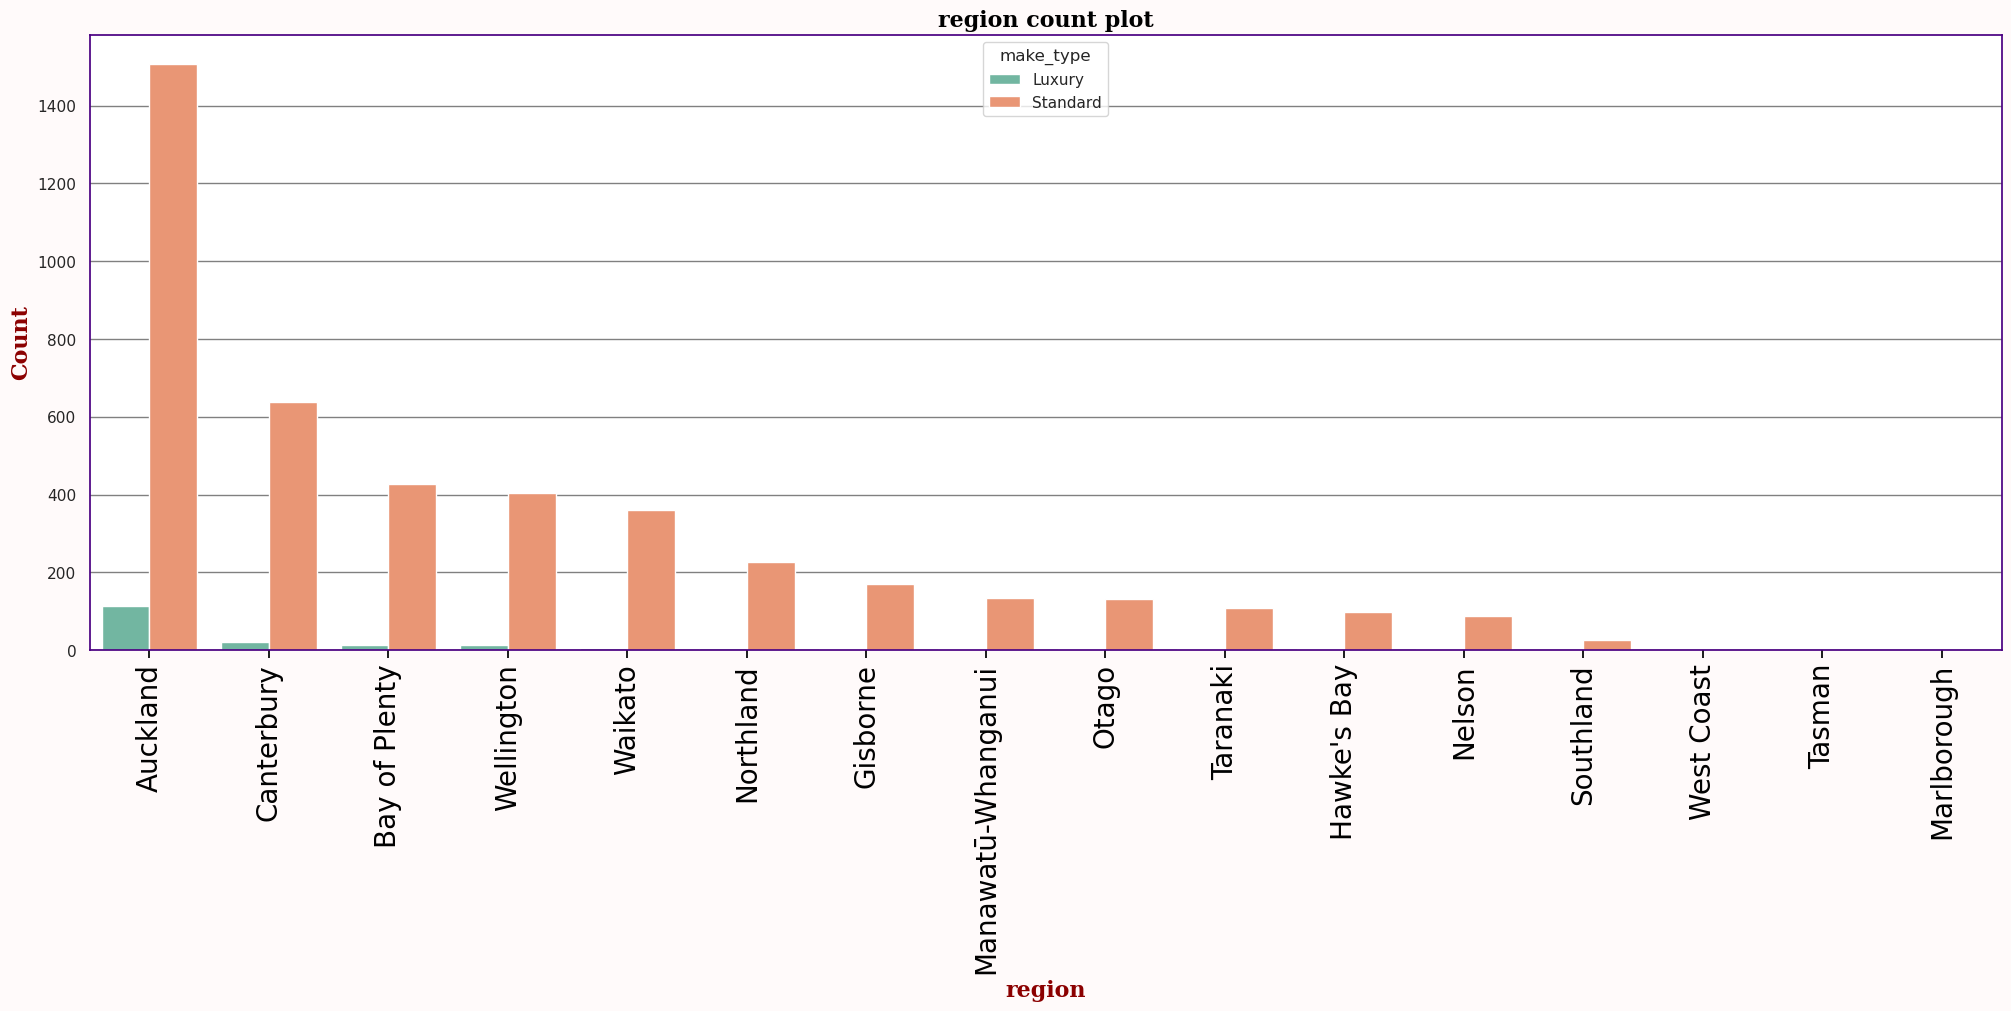

In [850]:
plotting_count2(full_merged_eda,'region','make_type')

In [852]:
# plotting_count2(full_merged_eda,'region','color')

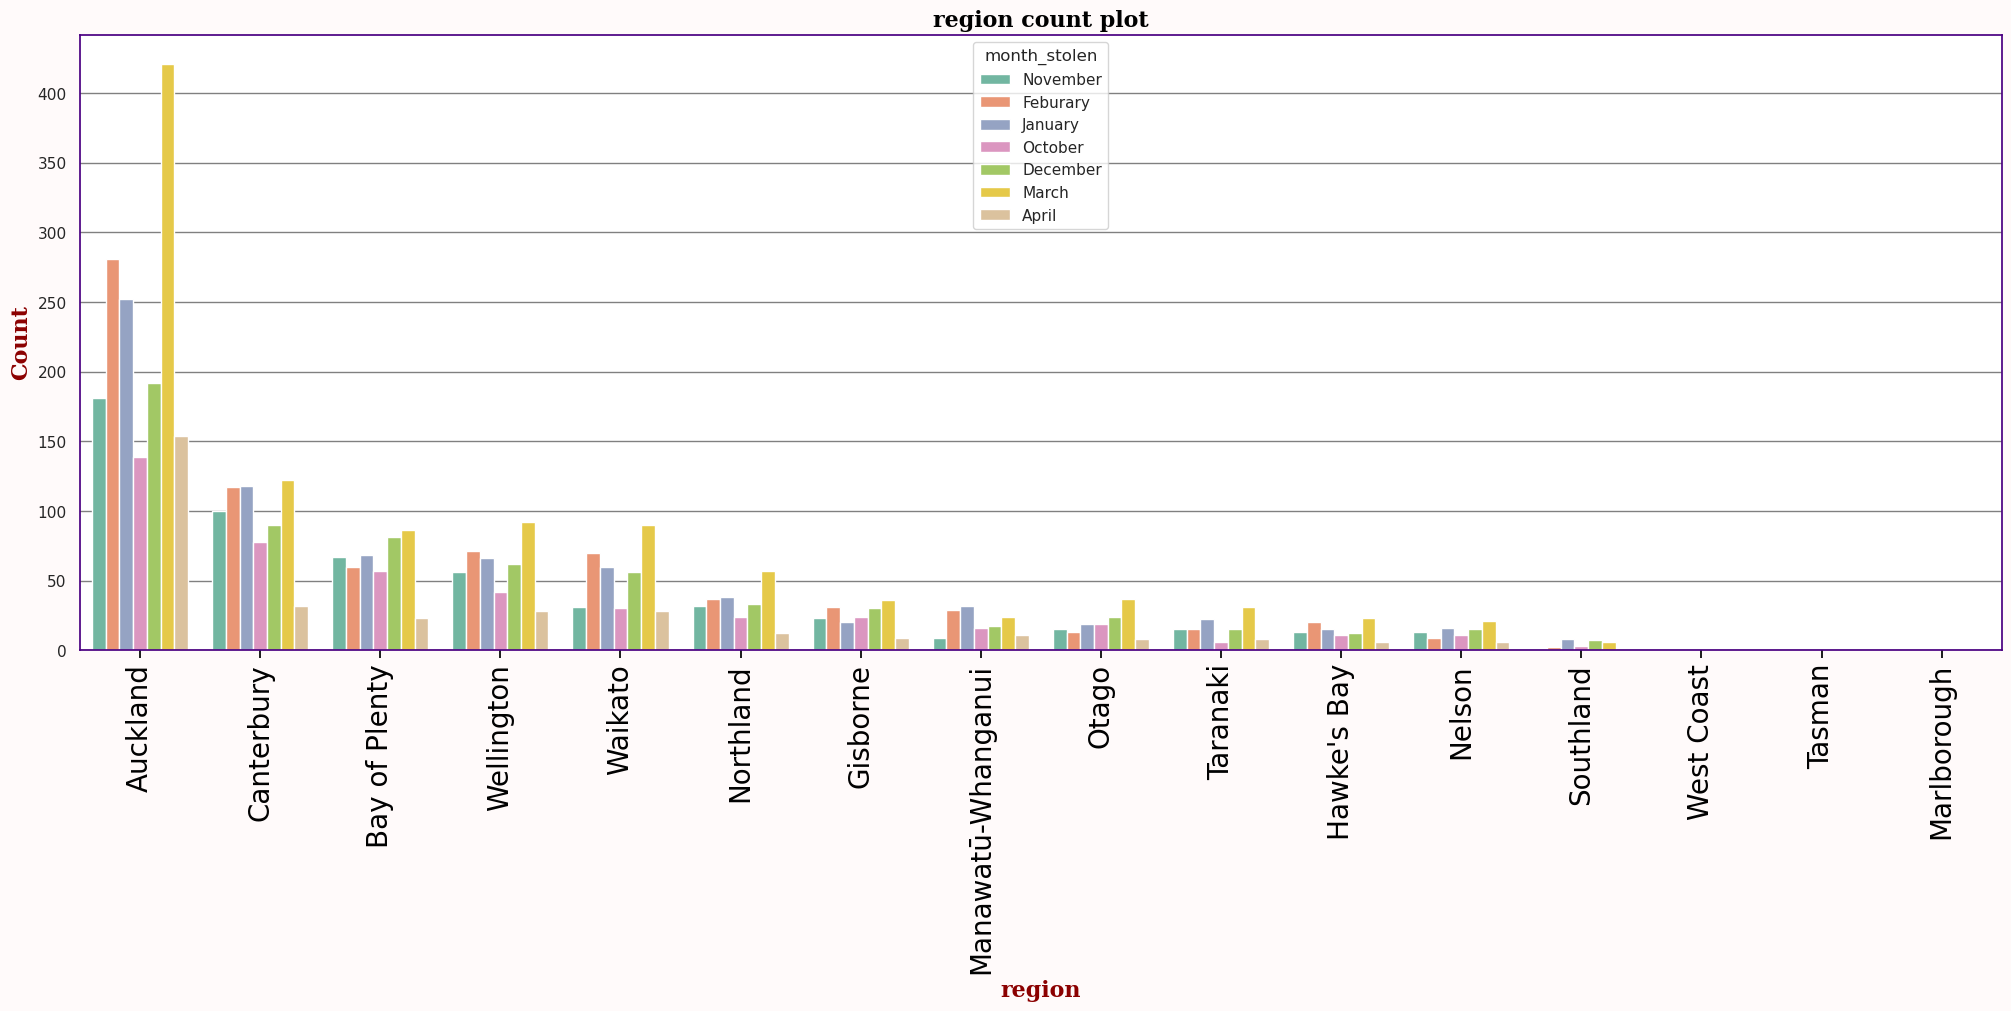

In [853]:
plotting_count2(full_merged_eda,'region','month_stolen')

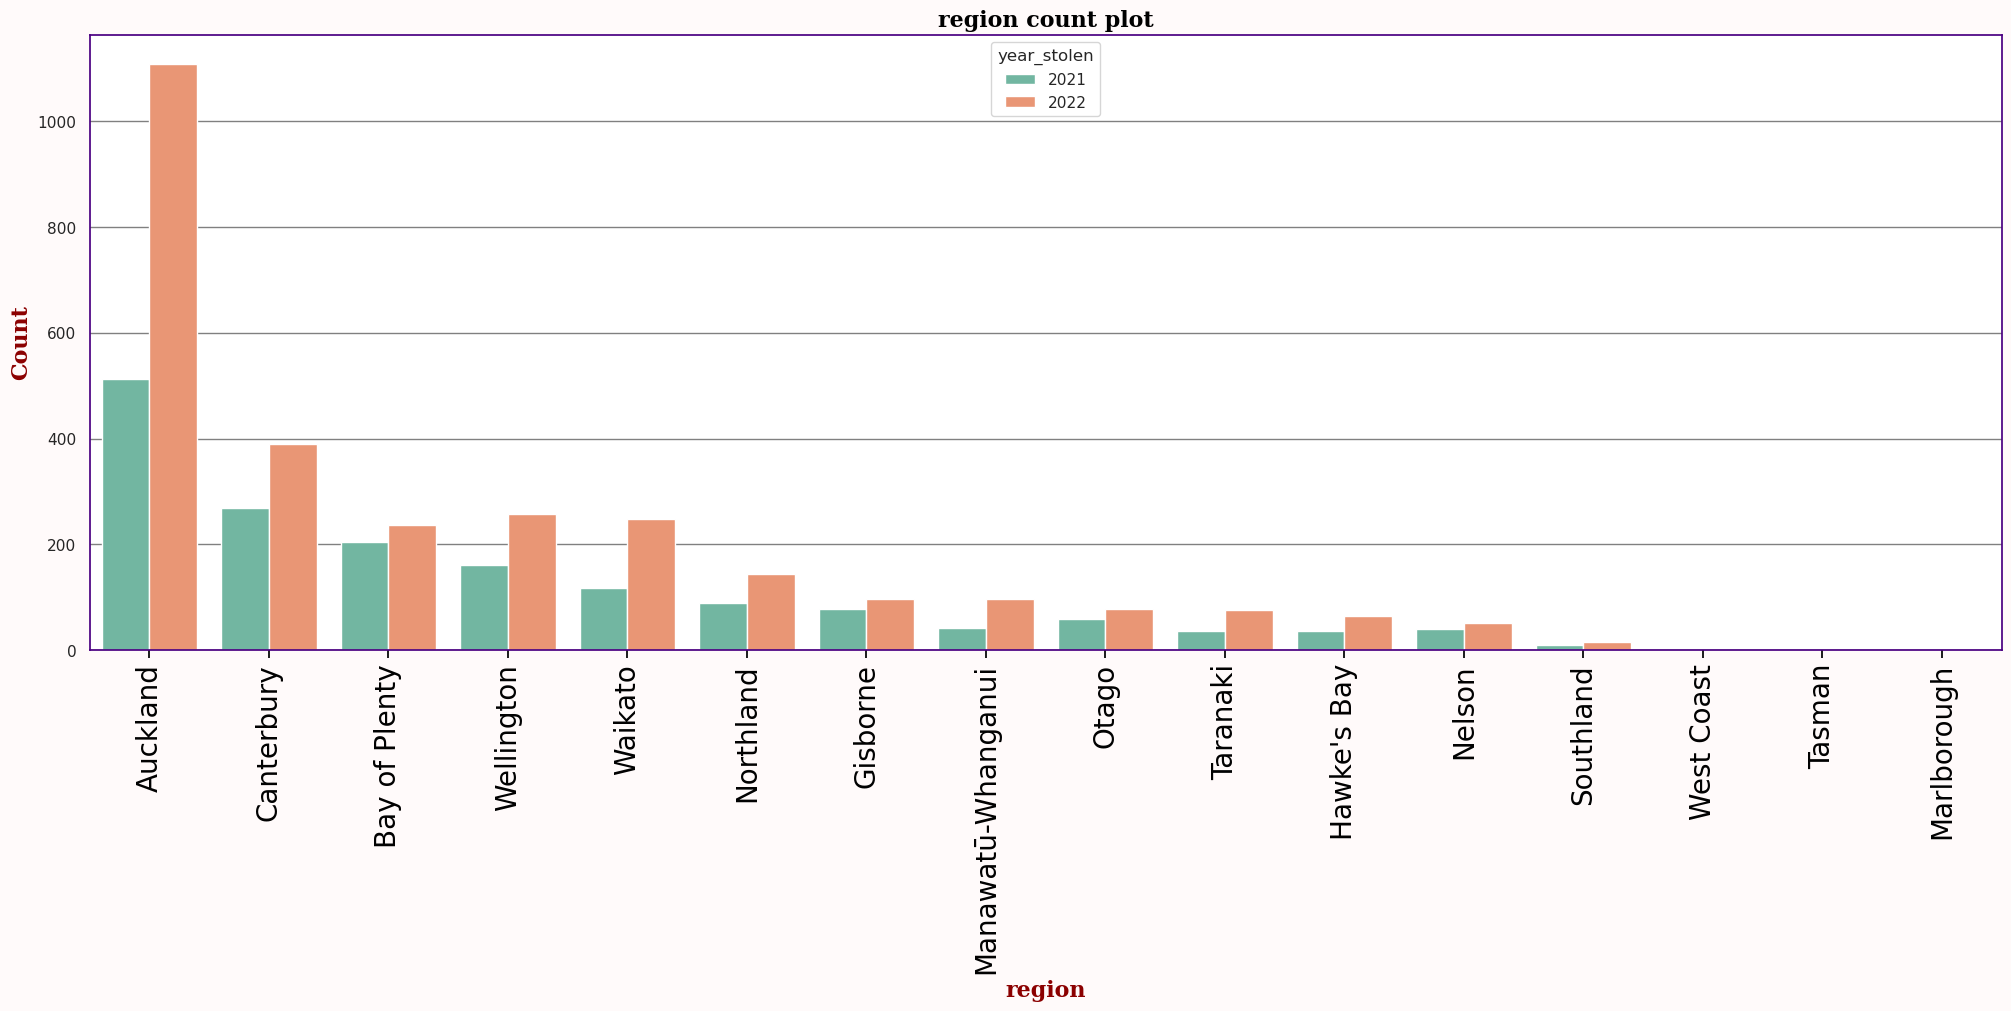

In [854]:
plotting_count2(full_merged_eda,'region','year_stolen')

**Observations**
- The standard version of Stationwagon is mostly stolen more than the luxury version
- Across all vehicle types, 2022 shows a high rate of car thefts.
- The top five vehicle types namely; Stationwagon, Saloon, Hatchback, Trailer and Utility have thefts above 100 in the month of March.
- Standard Vehicle models of year 2005 were more stolen in the year 2022 than 2021
- More standard vehicles were stolen across all regions with Auckland being the highest
- In the month of March, more vehicles were stolen across all regions with Auckland being the highest
- More vehicles were stolen in the year 2022 for all regions with Auckland being the highest

In [857]:
full_merged_eda.to_csv("../data/full_merged_data.csv",index=False)

In [862]:
# Export data for possible PowerBi analysis
stolen_vehicles_memory.to_csv("../data/stolen_vehicles_memory.csv",index=False)
make_details_featured.to_csv("../data/make_details_featured.csv",index=False)
location_featured.to_csv("../data/location_featured.csv",index=False)

# **Conclusion**

- Action should be taken to reduce car theft, especially in the month of March
- Seeing that there was a 73.4% increase in car theft in 2022, more security measures should be taken to address this issue.

### **Recommendation**

- Carry out clustering analysis on exported data 